# Importing Libraries

In [1]:
# import the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns",None)

# Read Application CSV

In [3]:
app_data=pd.read_csv("application_data.csv.zip")
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
app_data.size

37516342

In [5]:
app_data.shape

(307511, 122)

# Data Inspection on Appllication Dataset

# Get info and shape on the dataset

In [6]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


# Data Quality Check

In [7]:
# Check for percentage null values in Application dataset

In [8]:
pd.set_option("display.max_rows",200)
app_data.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [9]:
# . conclusion columns with null values more than 47% may give wrong insights,hence will drop them

# Dropping columns with missing values greater than 47%

In [10]:
percentage=47
threshold=int(((100-percentage)/100)*app_data.shape[0]+1)
app_df=app_data.dropna(axis=1,thresh=threshold)
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [11]:
app_df.shape

(307511, 73)

In [12]:
app_df.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

# Impute Missing Values

In [13]:
# Check Missing values in application dataset before imputing

In [14]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

### Occupation_Type column has 31% missing values,since its a categorical column, imputing the missing values with a unkonown or others value

In [15]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

31.345545362604916

In [16]:
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

OCCUPATION_TYPE
Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: proportion, dtype: float64

In [17]:
app_df.OCCUPATION_TYPE.fillna("Others",inplace=True)

In [18]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

0.0

In [19]:
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

OCCUPATION_TYPE
Others                   31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: proportion, dtype: float64

#### EXT_SOURCE_3 Column has 19% missing values

In [20]:
app_df.EXT_SOURCE_3.isnull().mean()*100

19.825307062186393

In [21]:
app_df.EXT_SOURCE_3.value_counts(normalize=True)

EXT_SOURCE_3
0.746300    0.005922
0.713631    0.005334
0.694093    0.005176
0.670652    0.004831
0.652897    0.004681
              ...   
0.021492    0.000004
0.019468    0.000004
0.023062    0.000004
0.014556    0.000004
0.043227    0.000004
Name: proportion, Length: 814, dtype: float64

In [22]:
app_df.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

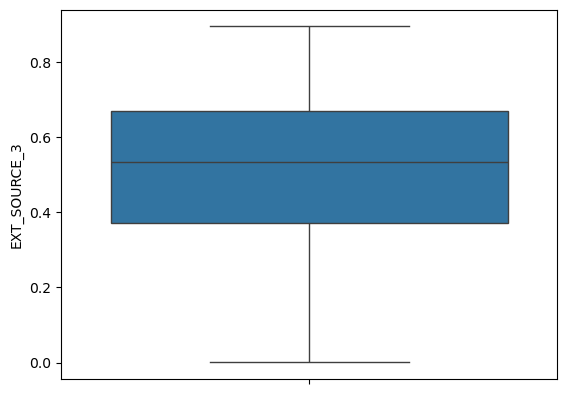

In [23]:
sns.boxplot(app_df.EXT_SOURCE_3)
plt.show()

In [24]:
app_df.EXT_SOURCE_3.fillna(app_df.EXT_SOURCE_3.median(),inplace=True)

In [25]:
app_df.EXT_SOURCE_3.isnull().mean()*100

0.0

In [26]:
app_df.EXT_SOURCE_3.value_counts(normalize=True)*100

EXT_SOURCE_3
0.535276    20.080908
0.746300     0.474780
0.713631     0.427627
0.694093     0.414945
0.670652     0.387303
              ...    
0.021492     0.000325
0.019468     0.000325
0.023062     0.000325
0.014556     0.000325
0.043227     0.000325
Name: proportion, Length: 814, dtype: float64

In [27]:
null_cols = list(app_df.columns[app_df.isna().any()])
len(null_cols)

16

In [28]:
app_df.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

### Handling missing values in columns

In [29]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: proportion, dtype: float64

In [30]:
app_df.AMT_REQ_CREDIT_BUREAU_MON.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_MON
0.0     83.548753
1.0     12.461653
2.0      2.024873
3.0      0.748519
4.0      0.404523
5.0      0.226323
6.0      0.128951
7.0      0.112033
9.0      0.077446
8.0      0.069551
10.0     0.049626
11.0     0.044738
12.0     0.028948
13.0     0.027068
14.0     0.015038
15.0     0.013158
16.0     0.008647
17.0     0.005263
18.0     0.002256
19.0     0.001128
24.0     0.000376
23.0     0.000376
27.0     0.000376
22.0     0.000376
Name: proportion, dtype: float64

In [31]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_DAY
0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: proportion, dtype: float64

- Conclusion : we couls see that 99% of values in the column AMT_REQ_CREDIT_BUREAU_DAY

In [32]:
Cols=["AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]

In [33]:
for col in Cols:
    app_df[col].fillna(app_df[col].mode()[0],inplace=True)

In [34]:
app_df.isnull().mean()*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


### Handling missing values less than 1%

In [35]:
nul_cols=list(app_df.columns[app_df.isna().any()])
len(null_cols)

16

In [36]:
app_df.NAME_TYPE_SUITE.value_counts(normalize=True)*100

NAME_TYPE_SUITE
Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: proportion, dtype: float64

In [37]:
app_df.EXT_SOURCE_2.value_counts(normalize=True)*100

EXT_SOURCE_2
0.285898    0.234967
0.262258    0.135897
0.265256    0.111781
0.159679    0.104937
0.265312    0.099723
              ...   
0.004725    0.000326
0.257313    0.000326
0.282030    0.000326
0.181540    0.000326
0.267834    0.000326
Name: proportion, Length: 119831, dtype: float64

In [38]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*100

OBS_30_CNT_SOCIAL_CIRCLE
0.0      53.479722
1.0      15.916669
2.0       9.725603
3.0       6.630559
4.0       4.614506
5.0       3.116904
6.0       2.105452
7.0       1.432347
8.0       0.968058
9.0       0.653529
10.0      0.448954
11.0      0.277986
12.0      0.212731
13.0      0.134099
14.0      0.084179
15.0      0.054162
16.0      0.043395
17.0      0.028712
18.0      0.015009
19.0      0.014356
20.0      0.009788
21.0      0.009462
22.0      0.007178
23.0      0.004894
25.0      0.003589
24.0      0.003589
27.0      0.001631
26.0      0.000979
30.0      0.000653
28.0      0.000326
29.0      0.000326
47.0      0.000326
348.0     0.000326
Name: proportion, dtype: float64

- Conclusion :
           - For categorical columns, impute the missing values with mode
           - For numerical columns, imputing the missing values with median

In [39]:
app_df.NAME_TYPE_SUITE.fillna(app_df.NAME_TYPE_SUITE.mode()[0],inplace=True)

In [40]:
app_df.CNT_FAM_MEMBERS.fillna(app_df.CNT_FAM_MEMBERS.mode()[0],inplace=True)

In [41]:
# Imputing Numerical Columns
app_df.EXT_SOURCE_2.fillna(app_df.EXT_SOURCE_3.median(),inplace=True)
app_df.AMT_GOODS_PRICE.fillna(app_df.AMT_GOODS_PRICE.median(),inplace=True)
app_df.AMT_ANNUITY.fillna(app_df.AMT_ANNUITY.median(),inplace=True)
app_df.DEF_60_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_60_CNT_SOCIAL_CIRCLE.median(),inplace=True)
app_df.DEF_30_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)
app_df.OBS_30_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)
app_df.OBS_60_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_60_CNT_SOCIAL_CIRCLE.median(),inplace=True)
app_df.DAYS_LAST_PHONE_CHANGE.fillna(app_df.DAYS_LAST_PHONE_CHANGE.median(),inplace=True)

In [42]:
null_cols = list(app_df.columns[app_df.isna().any()])
len(null_cols)

0

In [43]:
app_df.isnull().mean()*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS     

### Convert negative values to positive in days variablesso that median is not affected

In [44]:
app_df.DAYS_BIRTH=app_df.DAYS_BIRTH.apply(lambda x: abs(x))
app_df.DAYS_EMPLOYED=app_df.DAYS_EMPLOYED.apply(lambda x: abs(x))
app_df.DAYS_REGISTRATION=app_df.DAYS_REGISTRATION.apply(lambda x: abs(x))
app_df.DAYS_ID_PUBLISH=app_df.DAYS_ID_PUBLISH.apply(lambda x: abs(x))
app_df.DAYS_LAST_PHONE_CHANGE=app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: abs(x))

### Bining of continous variables
### Standardizing Days columns in years for easy bining


In [45]:
app_df["YEARS_BIRTH"]=app_df.DAYS_BIRTH.apply(lambda x: int(x//356))
app_df["YEARS_EMPLOYED"]=app_df.DAYS_EMPLOYED.apply(lambda x: int(x//356))
app_df["YEARS_REGISTRATION"]=app_df.DAYS_REGISTRATION.apply(lambda x: int(x//356))
app_df["YEARS_ID_PUBLISH"]=app_df.DAYS_ID_PUBLISH.apply(lambda x: int(x//356))
app_df["YEARS_LAST_PHONE_CHANGE"]=app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: int(x//356))

### Bining AMT_CREDIT Column

In [46]:
app_df.AMT_CREDIT.value_counts(normalize=True)*100

AMT_CREDIT
450000.0     3.157285
675000.0     2.886726
225000.0     2.654214
180000.0     2.387557
270000.0     2.354713
               ...   
487318.5     0.000325
630400.5     0.000325
1875276.0    0.000325
1395895.5    0.000325
1391130.0    0.000325
Name: proportion, Length: 5603, dtype: float64

In [47]:
app_df.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [48]:
app_df.AMT_CREDIT.describe().T

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [49]:
app_df["AMT_CREDIT_Category"]=pd.cut(app_df.AMT_CREDIT,[0,200000,400000,600000,800000,1000000],labels=["very low Credit","Low Credit","Medium Credit","High Credit","very High Credit"])

In [50]:
app_df.AMT_CREDIT_Category.value_counts(normalize=True)*100

AMT_CREDIT_Category
Low Credit          31.511770
Medium Credit       25.733324
High Credit         16.791314
very low Credit     14.035088
very High Credit    11.928504
Name: proportion, dtype: float64

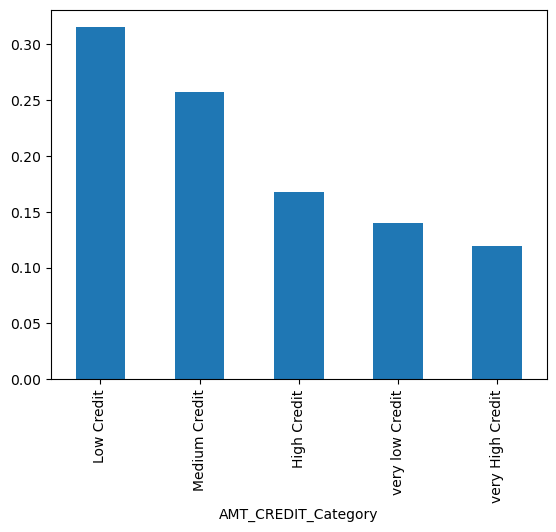

In [51]:
app_df["AMT_CREDIT_Category"].value_counts(normalize=True).plot.bar()
plt.show()

- Conclusion : The credit amount of the loan for the amount (2L to 4L) or very High (above 8L)

### Bining YEARS_BIRTH Column

In [52]:
app_df["Age_Category"]=pd.cut(app_df.YEARS_BIRTH,[0,25,45,65,85],labels=["Below 25","25-45","45-65","65-85"])

In [53]:
app_df.Age_Category.value_counts(normalize=True)*100

Age_Category
25-45       50.094143
45-65       41.772489
Below 25     4.426834
65-85        3.706534
Name: proportion, dtype: float64

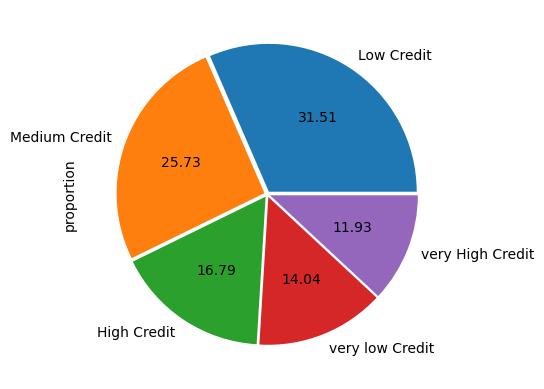

In [54]:
explode=(0.02,0.02,0.02,0.02,0.02)
app_df["AMT_CREDIT_Category"].value_counts(normalize=True).plot.pie(autopct="%1.2f",explode=explode)
plt.show()

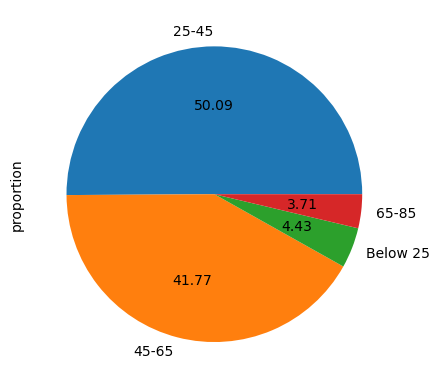

In [55]:
app_df["Age_Category"].value_counts(normalize=True).plot.pie(autopct="%1.2f")
plt.show()

#### most of the applicants are between 25-45 age group

In [56]:
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

#### Diving application dataset with target variables as 0 and 1

In [57]:
tar_0 = app_df[app_df.TARGET == 0]
tar_1 = app_df[app_df.TARGET == 1]

In [58]:
app_df.AMT_CREDIT_Category.value_counts(normalize=True)

AMT_CREDIT_Category
Low Credit          0.315118
Medium Credit       0.257333
High Credit         0.167913
very low Credit     0.140351
very High Credit    0.119285
Name: proportion, dtype: float64

In [59]:
app_df.AMT_CREDIT_Category.value_counts(normalize=True)*100

AMT_CREDIT_Category
Low Credit          31.511770
Medium Credit       25.733324
High Credit         16.791314
very low Credit     14.035088
very High Credit    11.928504
Name: proportion, dtype: float64

In [60]:
app_df.TARGET.value_counts(normalize=True)*100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

##### Conclusion : 1 out of 9/10 applicants are defaults

# UNIVARIATE Analysis

In [61]:
cat_cols=list(app_df.columns[app_df.dtypes=="object"])
num_cols=list(app_df.columns[app_df.dtypes=="int64"])+list(app_df.columns[app_df.dtypes=="float64"])

In [62]:
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [63]:
num_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE',
 'AMT_INCOME_TOTAL'

NAME_CONTRACT_TYPE
Cash loans         0.904787
Revolving loans    0.095213
Name: proportion, dtype: float64


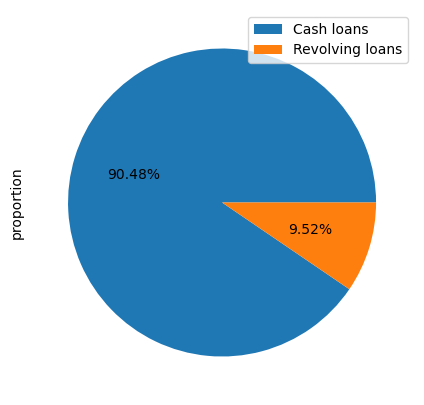

CODE_GENDER
F      0.658344
M      0.341643
XNA    0.000013
Name: proportion, dtype: float64


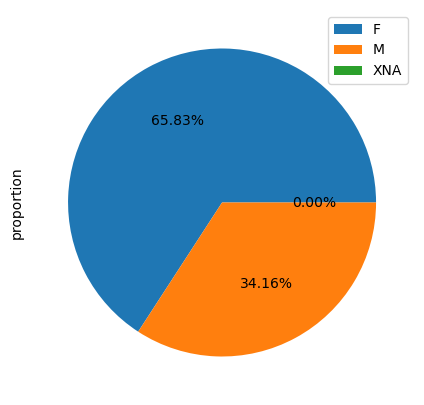

FLAG_OWN_CAR
N    0.659892
Y    0.340108
Name: proportion, dtype: float64


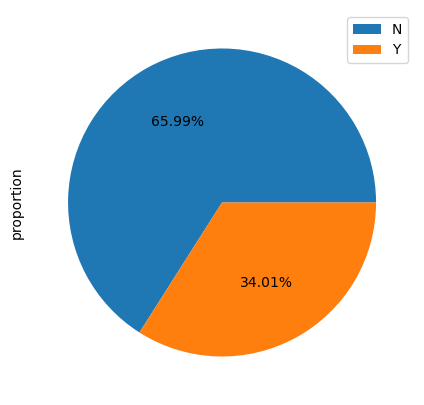

FLAG_OWN_REALTY
Y    0.693673
N    0.306327
Name: proportion, dtype: float64


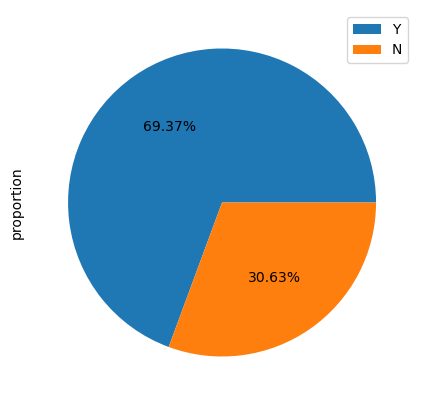

NAME_TYPE_SUITE
Unaccompanied      0.812387
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: proportion, dtype: float64


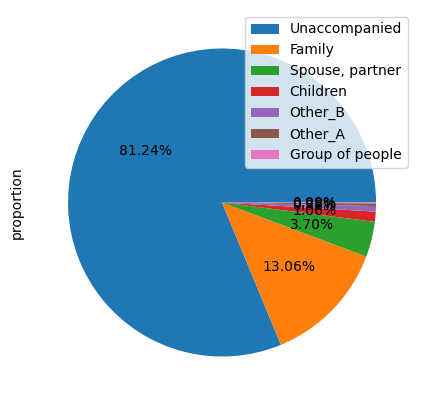

NAME_INCOME_TYPE
Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: proportion, dtype: float64


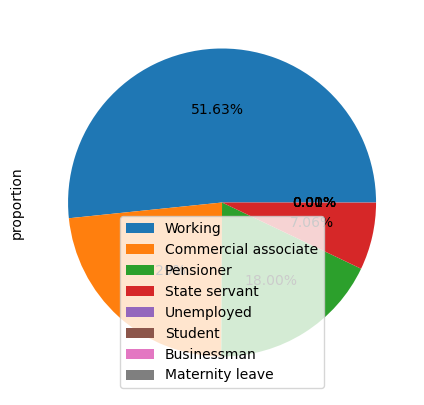

NAME_EDUCATION_TYPE
Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: proportion, dtype: float64


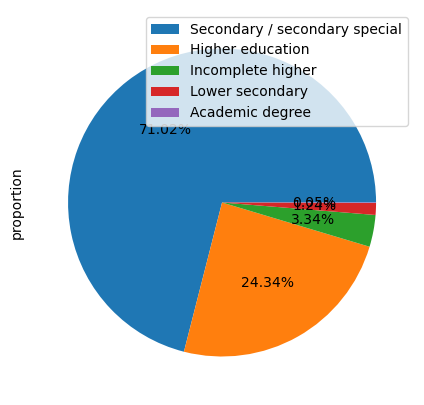

NAME_FAMILY_STATUS
Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: proportion, dtype: float64


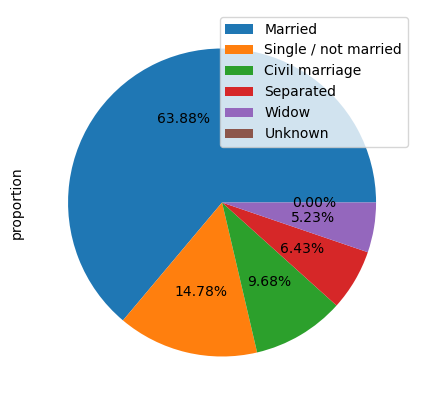

NAME_HOUSING_TYPE
House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: proportion, dtype: float64


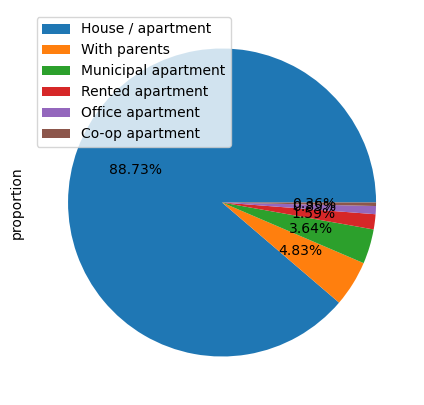

OCCUPATION_TYPE
Others                   0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: proportion, dtype: float64


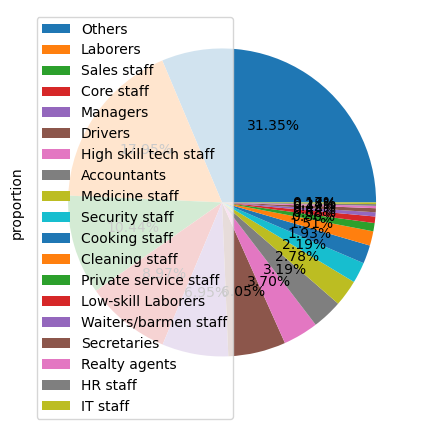

WEEKDAY_APPR_PROCESS_START
TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: proportion, dtype: float64


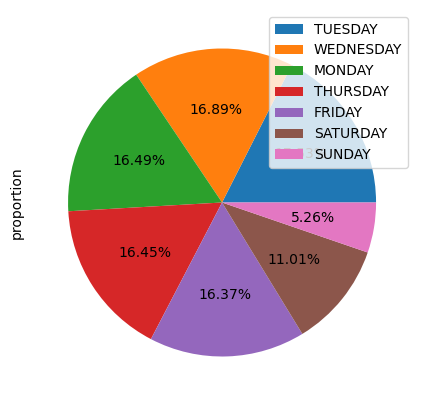

ORGANIZATION_TYPE
Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Se

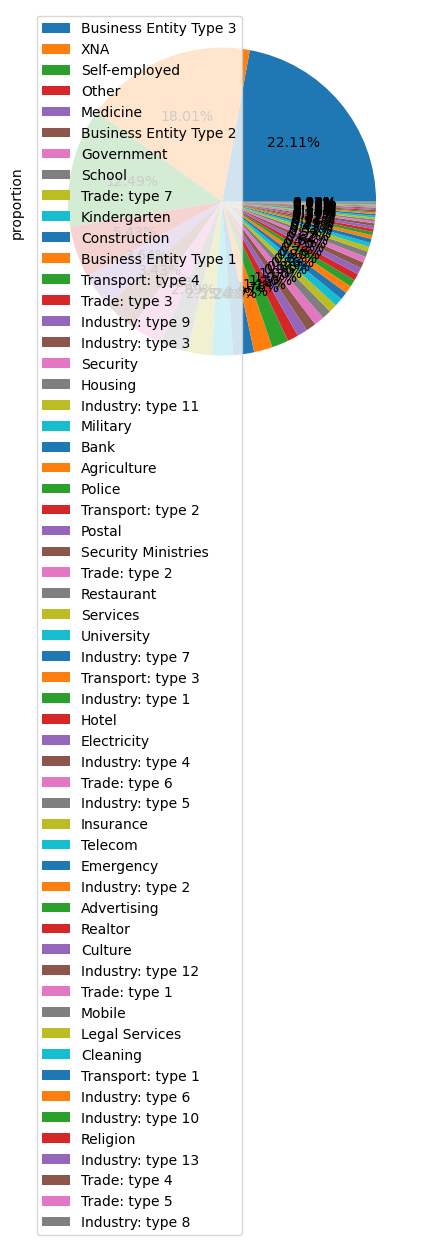

In [64]:
for col in cat_cols:
    print(app_df[col].value_counts(normalize=True))
    plt.figure(figsize=[5,5])
    app_df[col].value_counts(normalize=True).plot.pie(labeldistance=None,autopct="%1.2f%%")
    plt.legend()
    plt.show()

-Conclusion : Insights on below columns


### plot on Numerical columns
- categorizing columns with and without flags

In [65]:
num_cols_without_flag=[]
num_cols_withflag=[]
for col in num_cols:
    if col.startswith("FLAG"):
        num_cols_withflag.append(col)
    else:
        num_cols_without_flag.append(col)

In [66]:
num_cols_withflag

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [67]:
num_cols_without_flag

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64


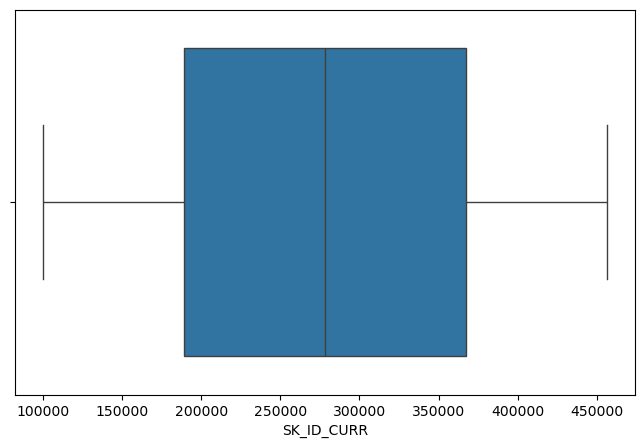

______________________________________________________
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64


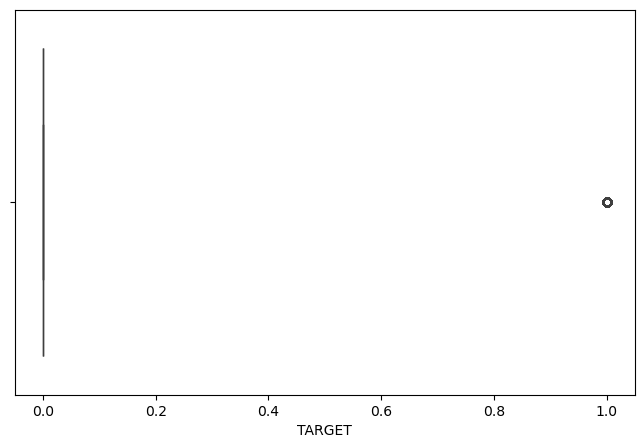

______________________________________________________
count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


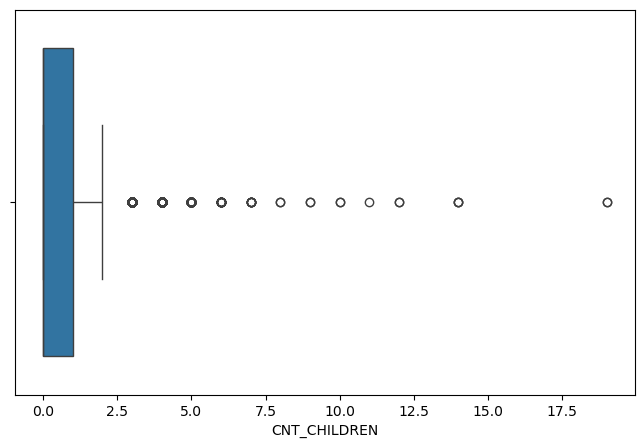

______________________________________________________
count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64


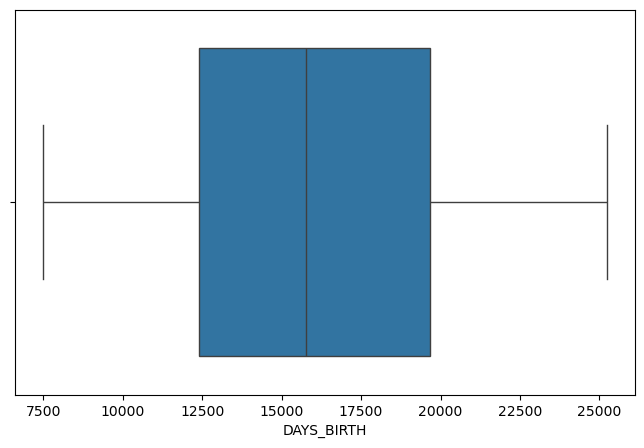

______________________________________________________
count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


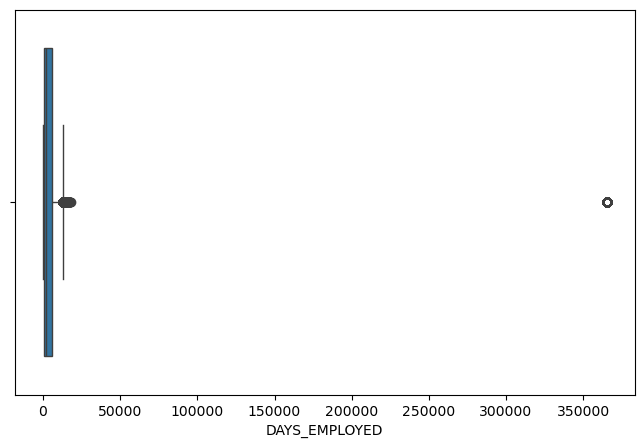

______________________________________________________
count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64


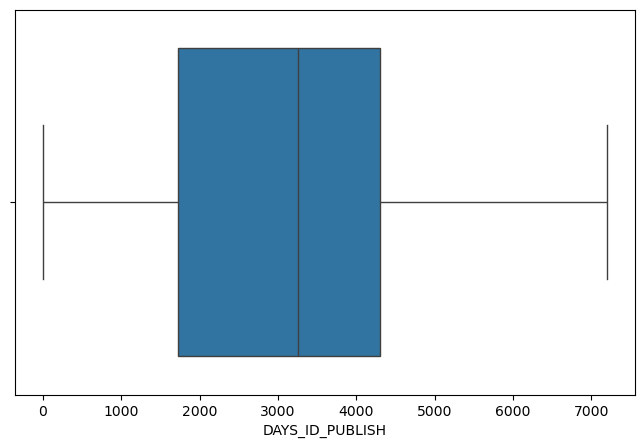

______________________________________________________
count    307511.000000
mean          2.052463
std           0.509034
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64


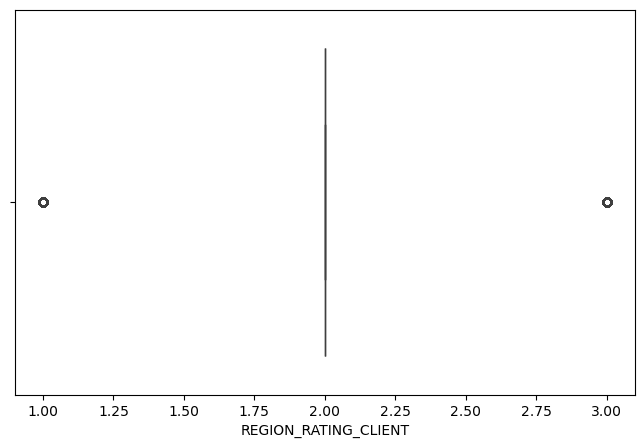

______________________________________________________
count    307511.000000
mean          2.031521
std           0.502737
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


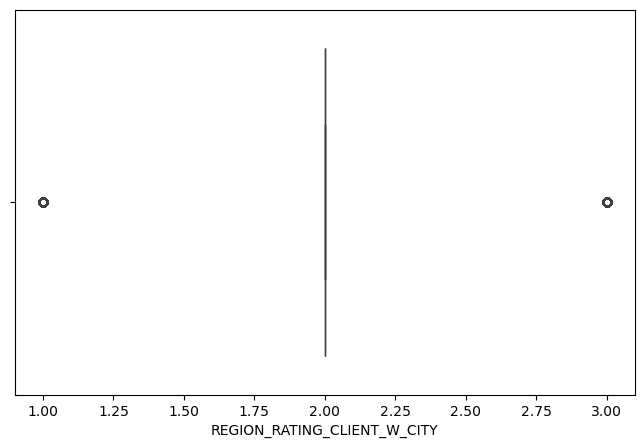

______________________________________________________
count    307511.000000
mean         12.063419
std           3.265832
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


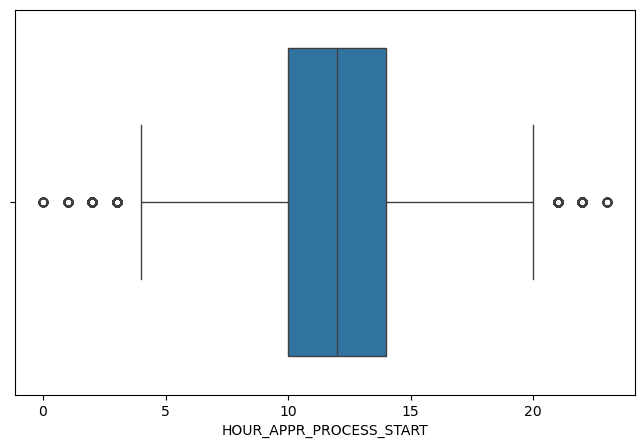

______________________________________________________
count    307511.000000
mean          0.015144
std           0.122126
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64


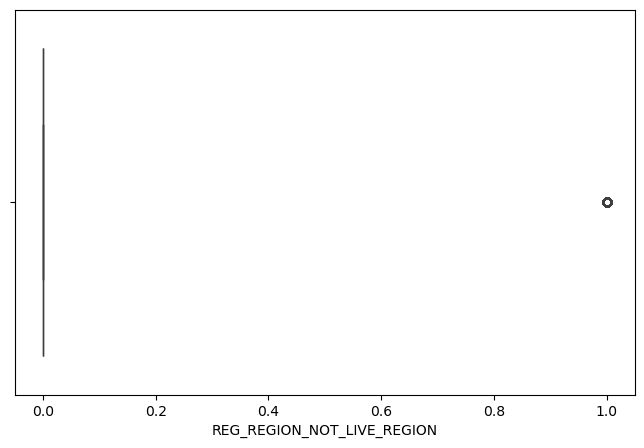

______________________________________________________
count    307511.000000
mean          0.050769
std           0.219526
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_WORK_REGION, dtype: float64


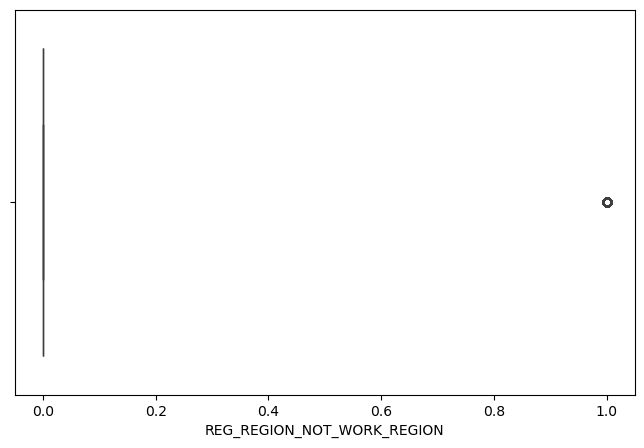

______________________________________________________
count    307511.000000
mean          0.040659
std           0.197499
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64


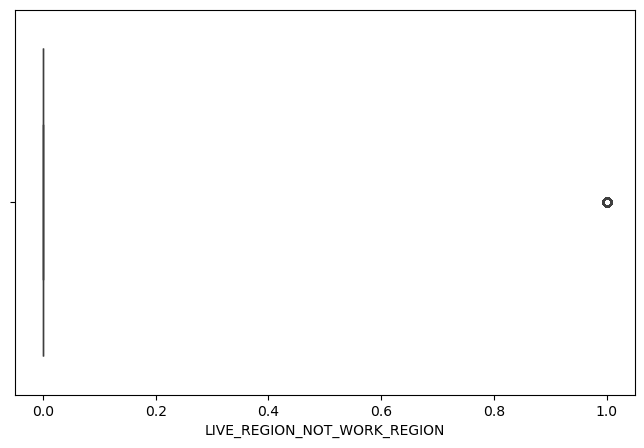

______________________________________________________
count    307511.000000
mean          0.078173
std           0.268444
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64


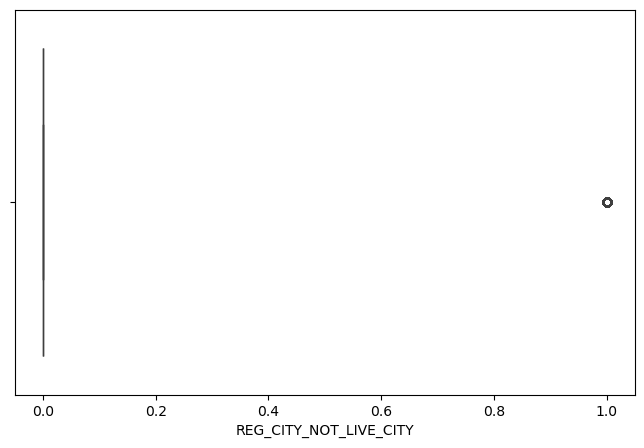

______________________________________________________
count    307511.000000
mean          0.230454
std           0.421124
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_WORK_CITY, dtype: float64


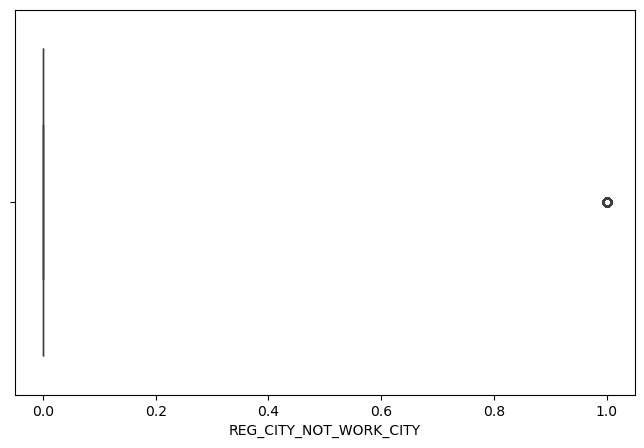

______________________________________________________
count    307511.000000
mean          0.179555
std           0.383817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64


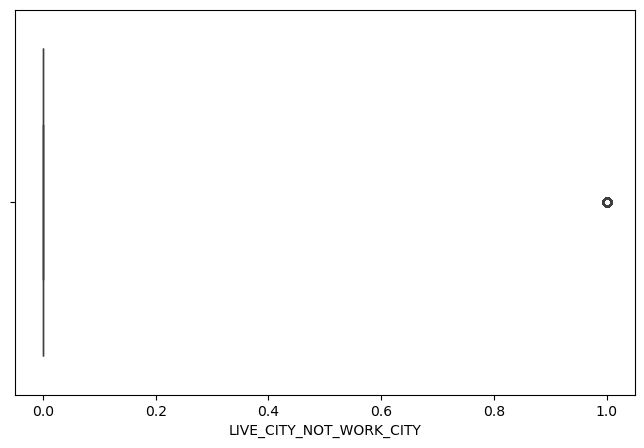

______________________________________________________
count    307511.000000
mean         44.548992
std          12.263409
min          21.000000
25%          34.000000
50%          44.000000
75%          55.000000
max          70.000000
Name: YEARS_BIRTH, dtype: float64


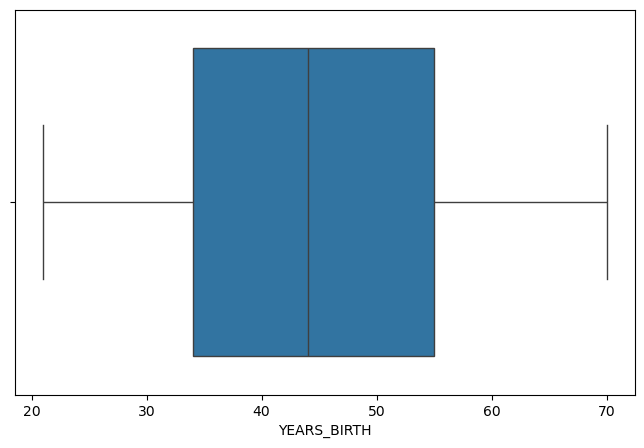

______________________________________________________
count    307511.000000
mean        189.656025
std         391.517218
min           0.000000
25%           2.000000
50%           6.000000
75%          16.000000
max        1025.000000
Name: YEARS_EMPLOYED, dtype: float64


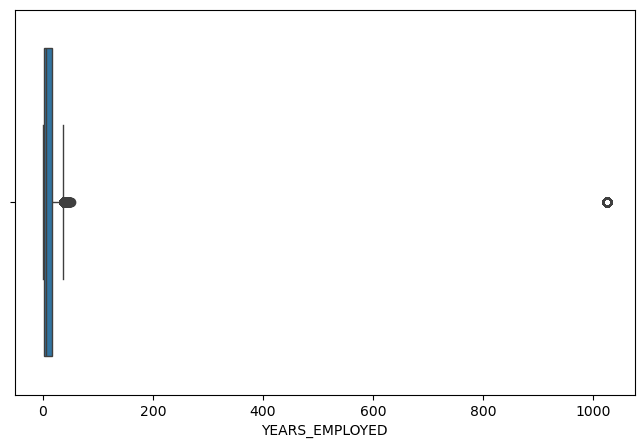

______________________________________________________
count    307511.000000
mean         13.513478
std           9.891137
min           0.000000
25%           5.000000
50%          12.000000
75%          21.000000
max          69.000000
Name: YEARS_REGISTRATION, dtype: float64


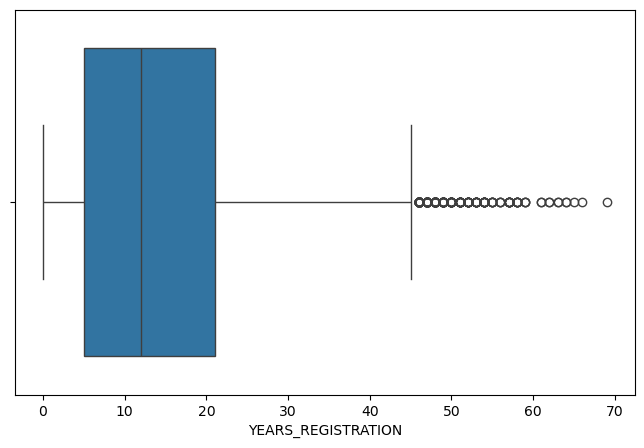

______________________________________________________
count    307511.000000
mean          7.920845
std           4.238167
min           0.000000
25%           4.000000
50%           9.000000
75%          12.000000
max          20.000000
Name: YEARS_ID_PUBLISH, dtype: float64


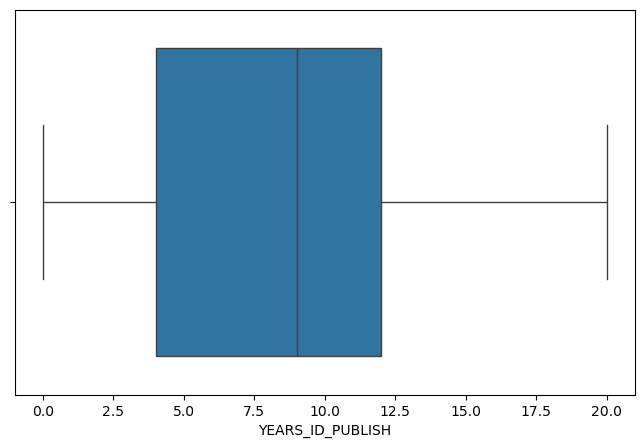

______________________________________________________
count    307511.000000
mean          2.293102
std           2.249671
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          12.000000
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64


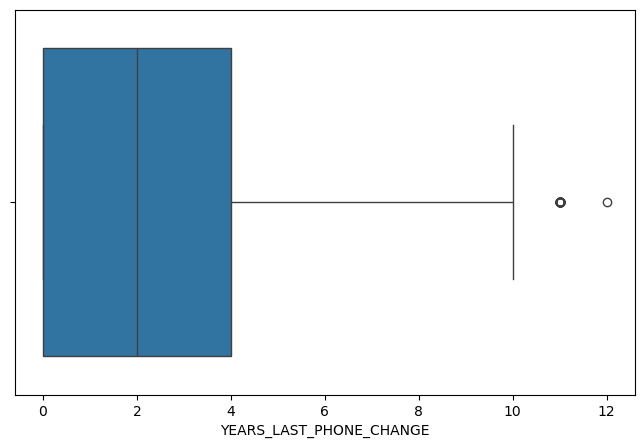

______________________________________________________
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


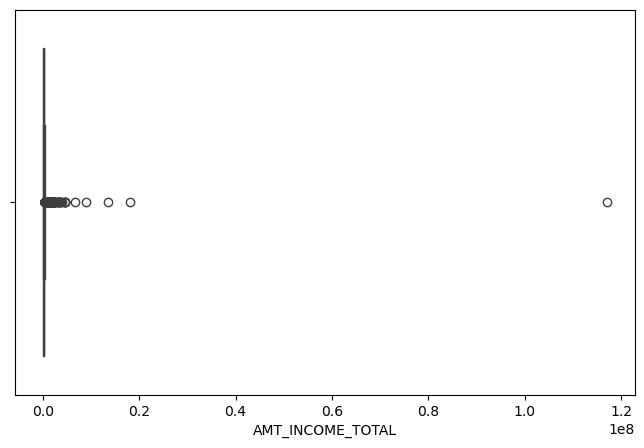

______________________________________________________
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


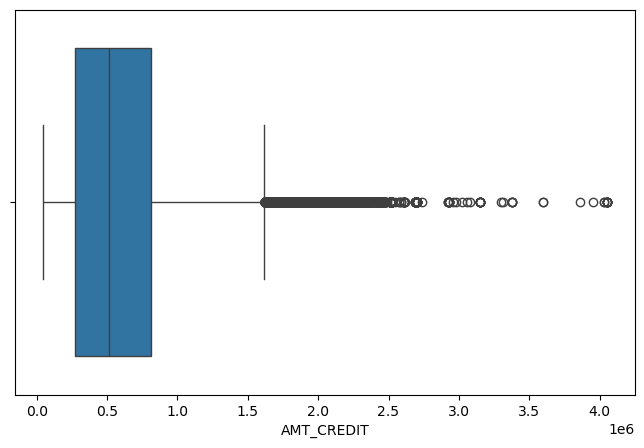

______________________________________________________
count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


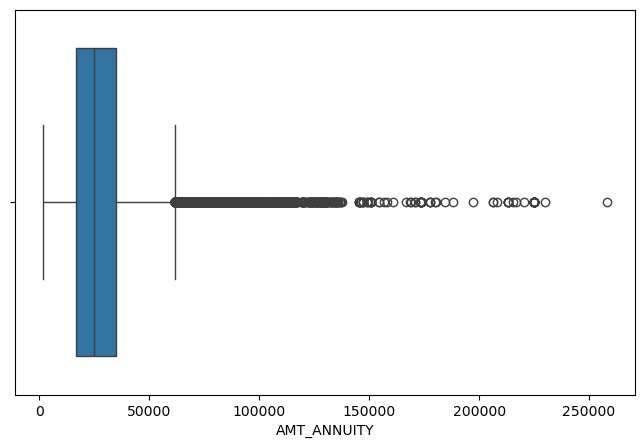

______________________________________________________
count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


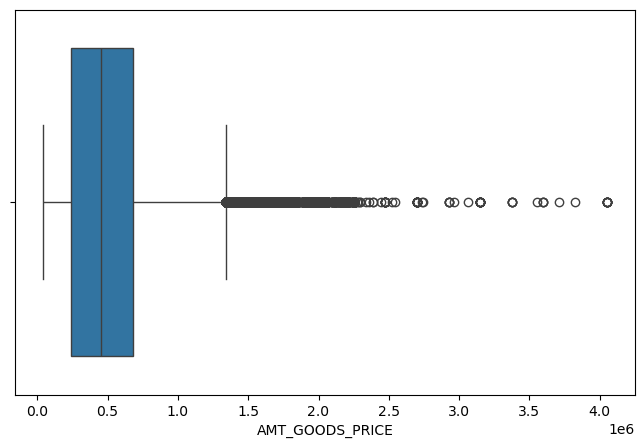

______________________________________________________
count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


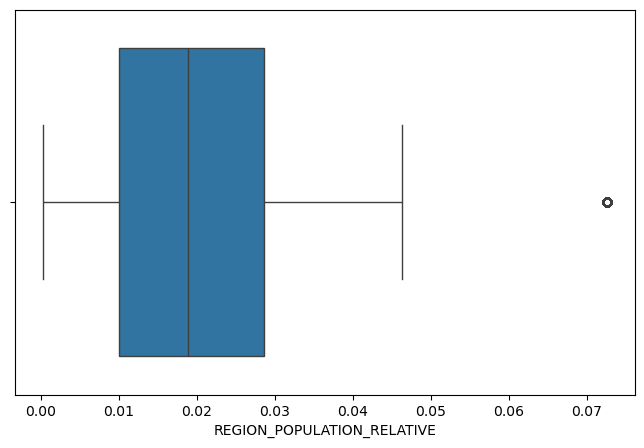

______________________________________________________
count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64


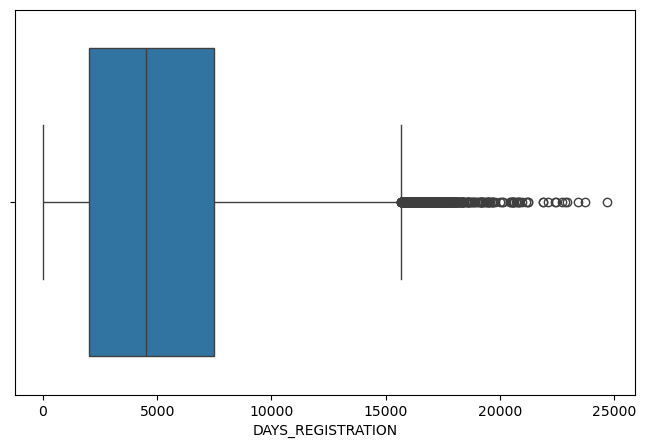

______________________________________________________
count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


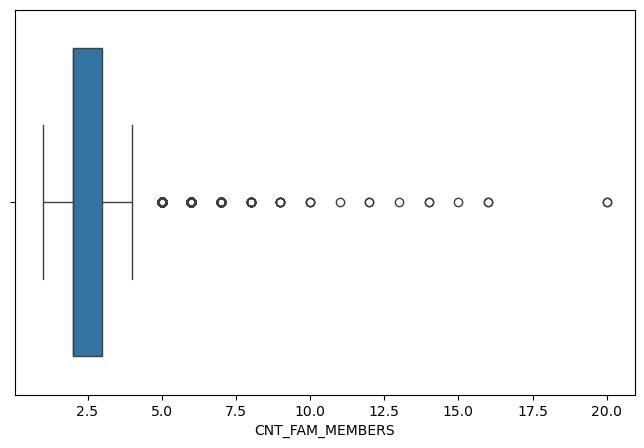

______________________________________________________
count    3.075110e+05
mean     5.144375e-01
std      1.908575e-01
min      8.173617e-08
25%      3.929737e-01
50%      5.654672e-01
75%      6.634218e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


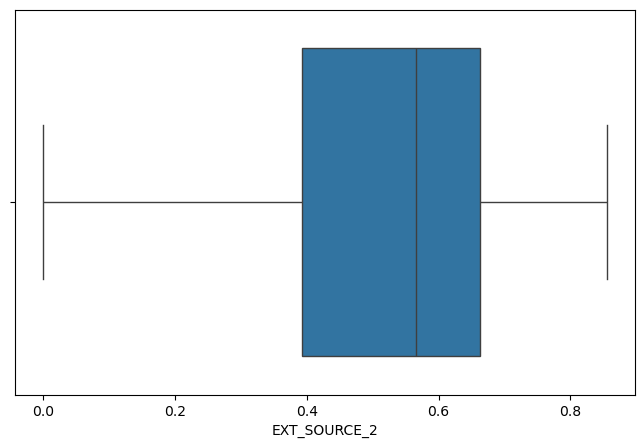

______________________________________________________
count    307511.000000
mean          0.515695
std           0.174736
min           0.000527
25%           0.417100
50%           0.535276
75%           0.636376
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


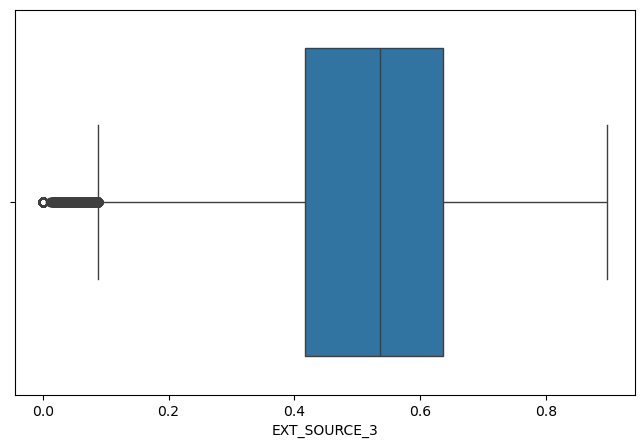

______________________________________________________
count    307511.000000
mean          1.417523
std           2.398395
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


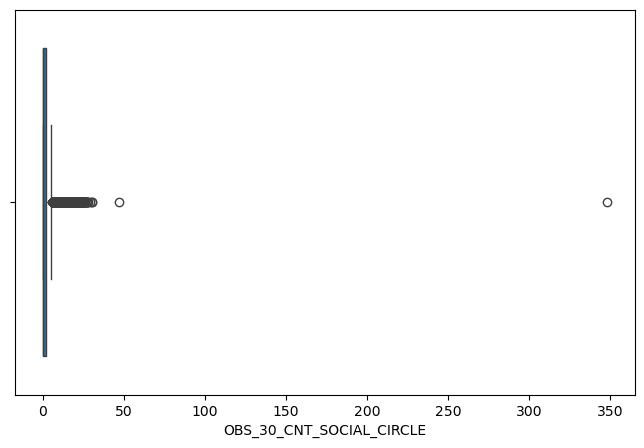

______________________________________________________
count    307511.000000
mean          0.142944
std           0.446033
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


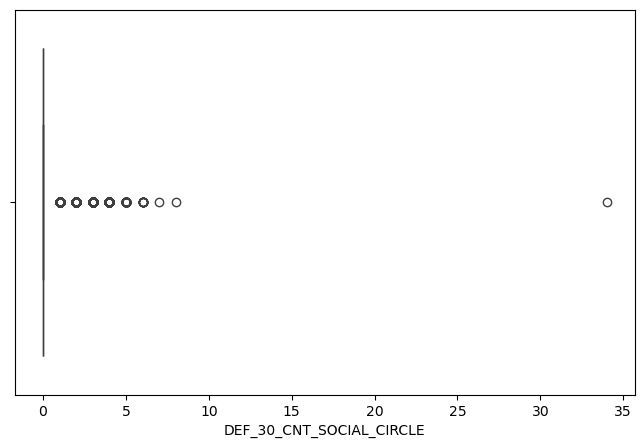

______________________________________________________
count    307511.000000
mean          1.400626
std           2.377224
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


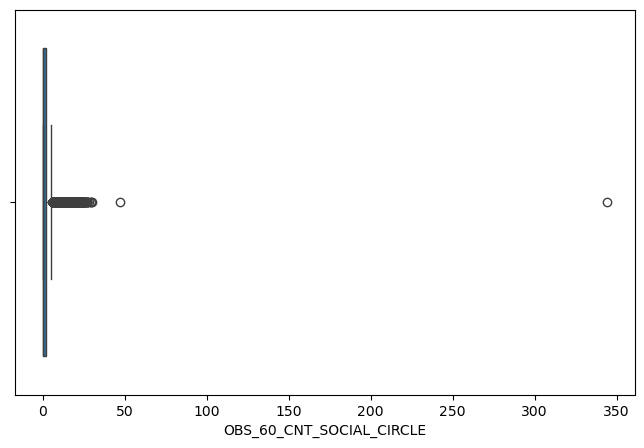

______________________________________________________
count    307511.000000
mean          0.099717
std           0.361735
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


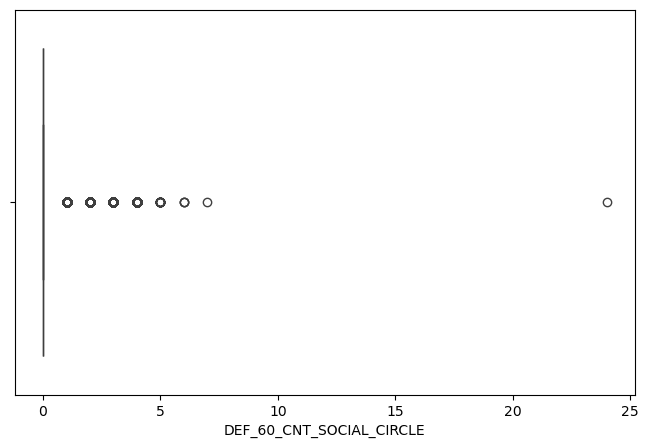

______________________________________________________
count    307511.000000
mean        962.858119
std         826.807226
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


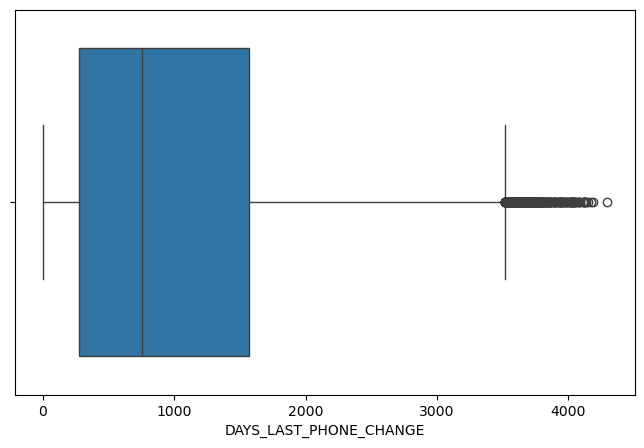

______________________________________________________
count    307511.000000
mean          0.005538
std           0.078014
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


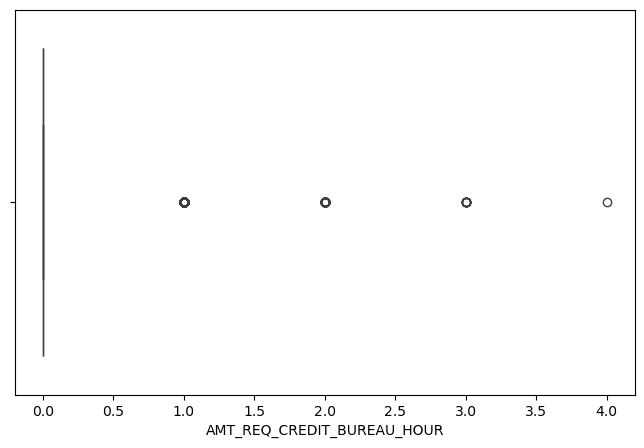

______________________________________________________
count    307511.000000
mean          0.006055
std           0.103037
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


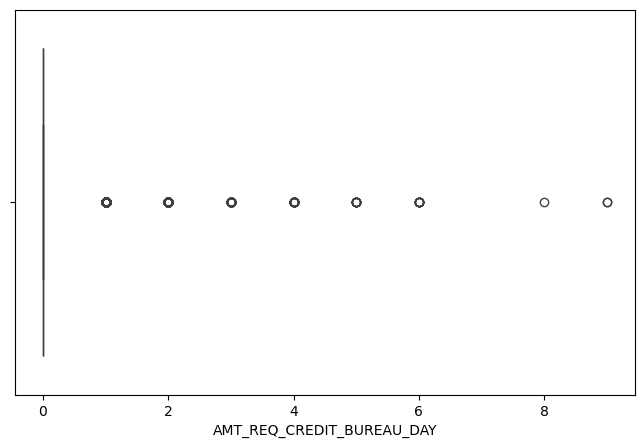

______________________________________________________
count    307511.000000
mean          0.029723
std           0.190728
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


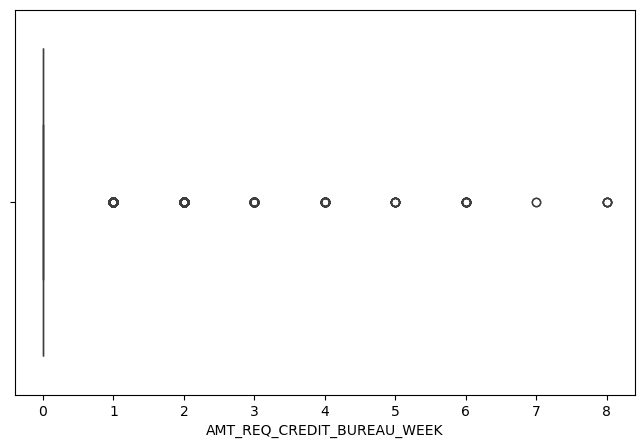

______________________________________________________
count    307511.000000
mean          0.231293
std           0.856810
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


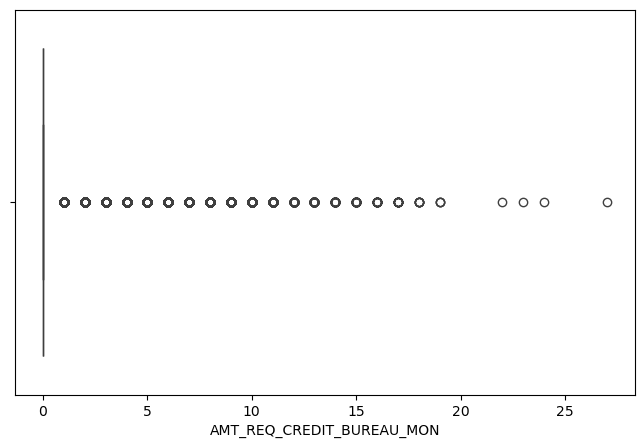

______________________________________________________
count    307511.000000
mean          0.229631
std           0.744059
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


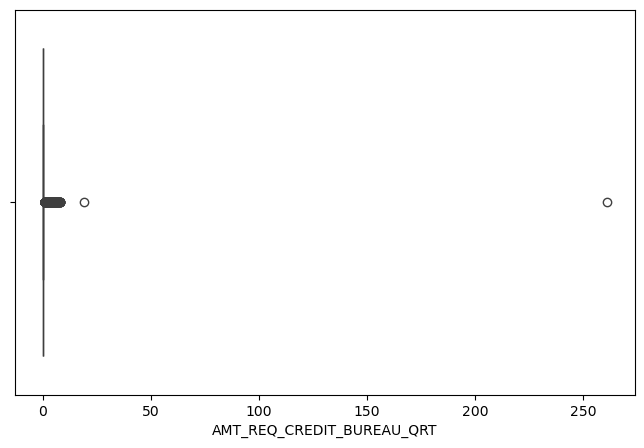

______________________________________________________
count    307511.000000
mean          1.643447
std           1.855821
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


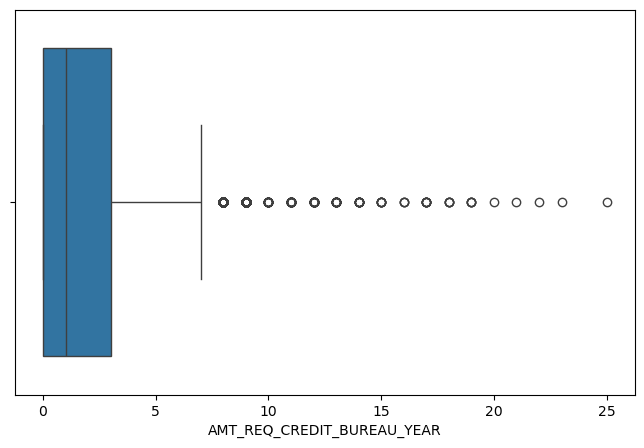

______________________________________________________


In [68]:
for col in num_cols_without_flag:
    print(app_df[col].describe())
    plt.figure(figsize=[8,5])
    sns.boxplot(data=app_df,x=col)
    plt.show()
    print("______________________________________________________")

plot on NAME_CONTRACT_TYPE for Target 0 and 1


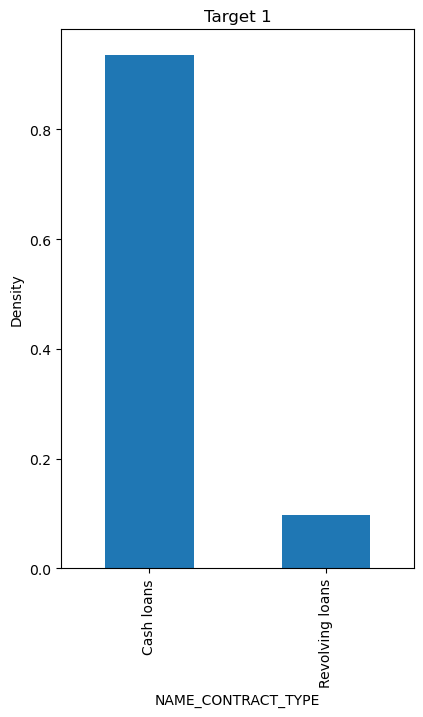



____________________________________________________________________________


plot on CODE_GENDER for Target 0 and 1


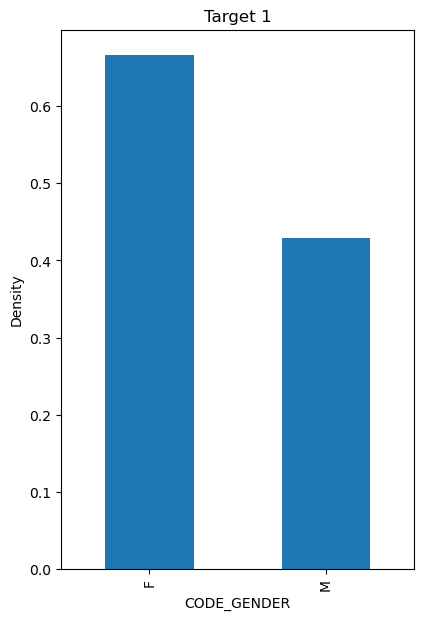



____________________________________________________________________________


plot on FLAG_OWN_CAR for Target 0 and 1


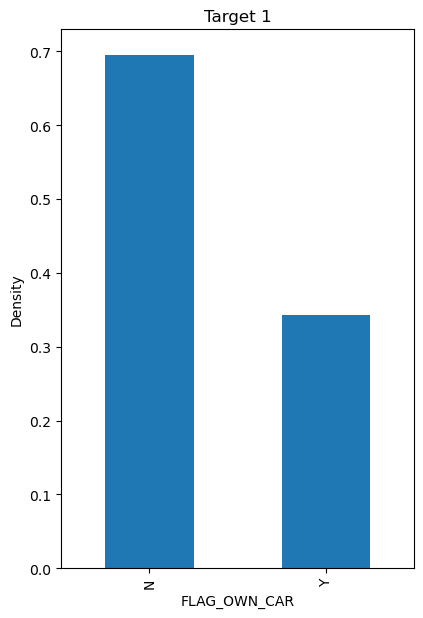



____________________________________________________________________________


plot on FLAG_OWN_REALTY for Target 0 and 1


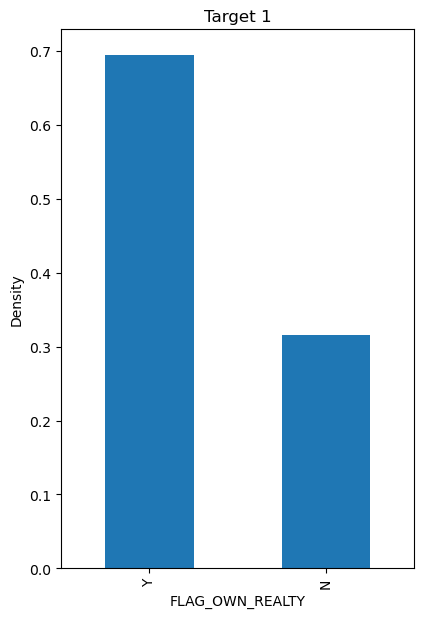



____________________________________________________________________________


plot on NAME_TYPE_SUITE for Target 0 and 1


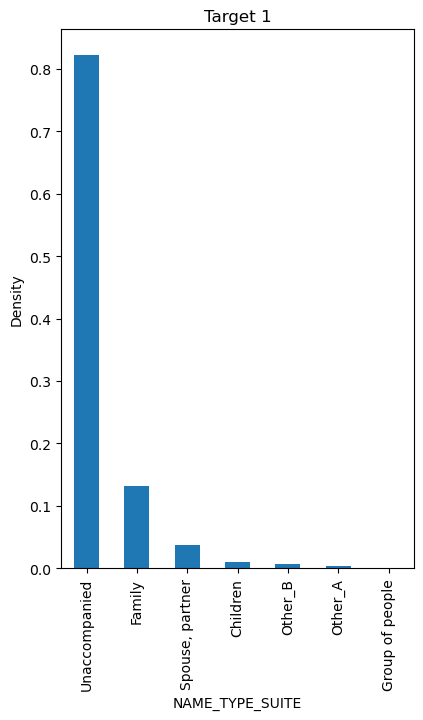



____________________________________________________________________________


plot on NAME_INCOME_TYPE for Target 0 and 1


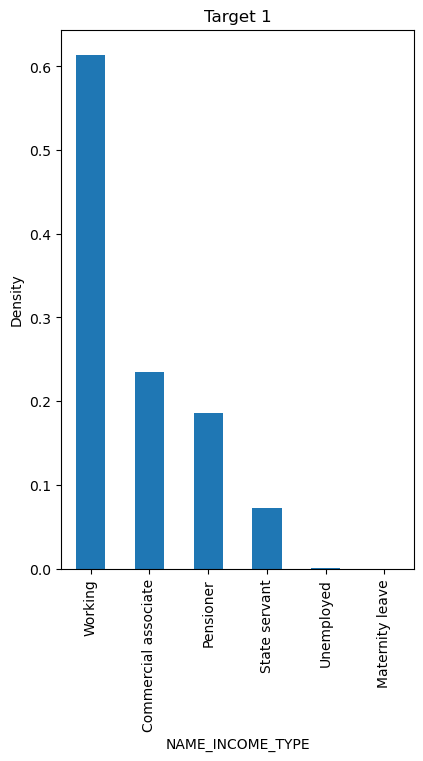



____________________________________________________________________________


plot on NAME_EDUCATION_TYPE for Target 0 and 1


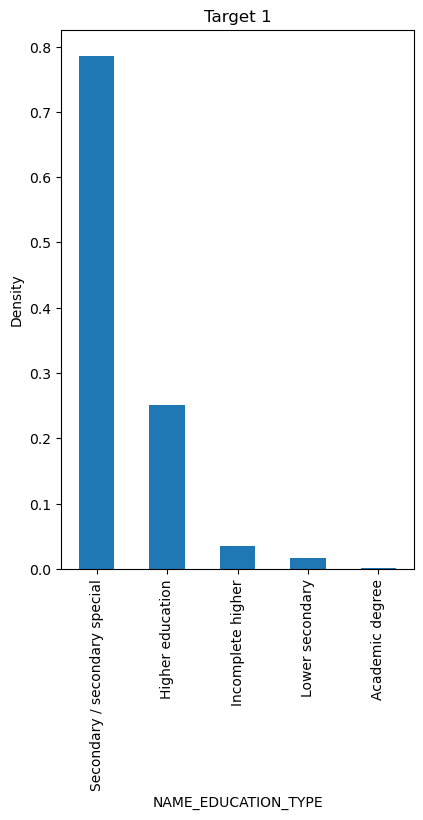



____________________________________________________________________________


plot on NAME_FAMILY_STATUS for Target 0 and 1


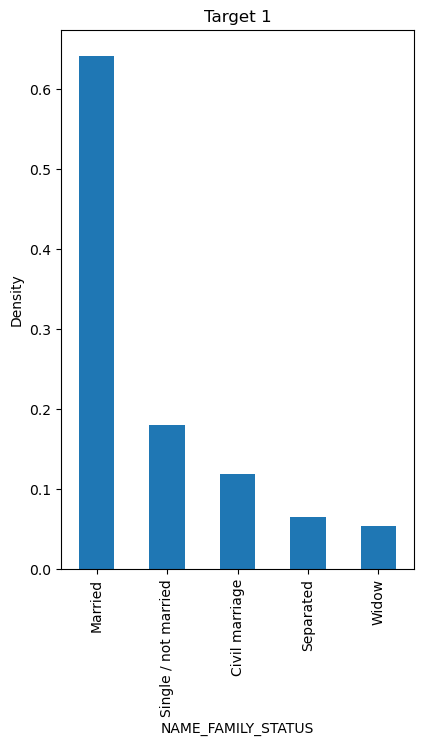



____________________________________________________________________________


plot on NAME_HOUSING_TYPE for Target 0 and 1


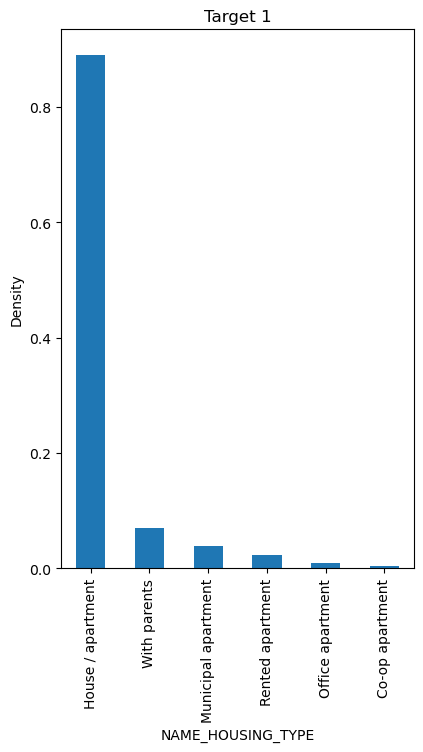



____________________________________________________________________________


plot on OCCUPATION_TYPE for Target 0 and 1


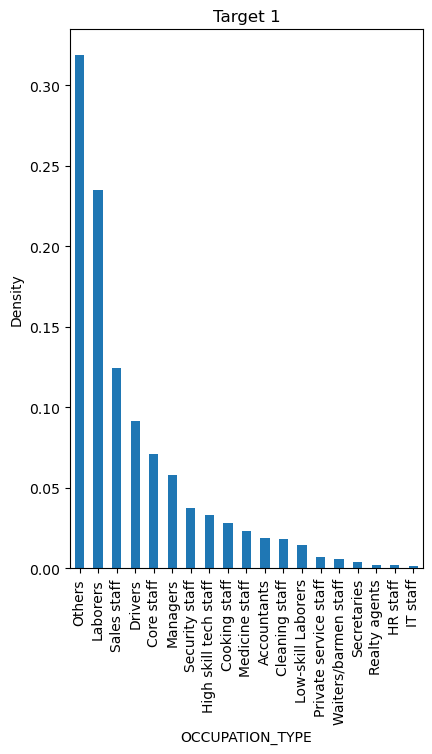



____________________________________________________________________________


plot on WEEKDAY_APPR_PROCESS_START for Target 0 and 1


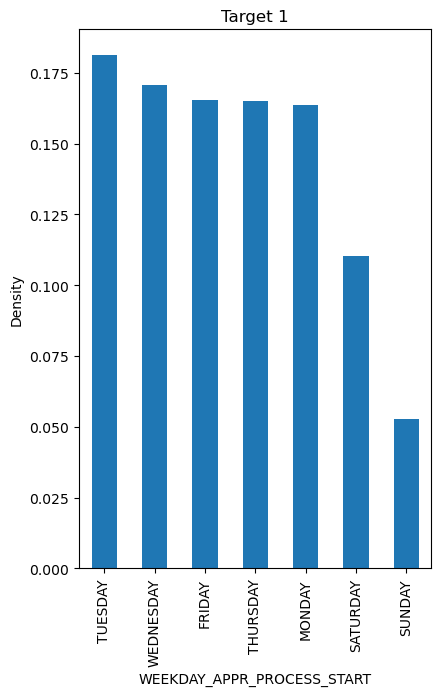



____________________________________________________________________________


plot on ORGANIZATION_TYPE for Target 0 and 1


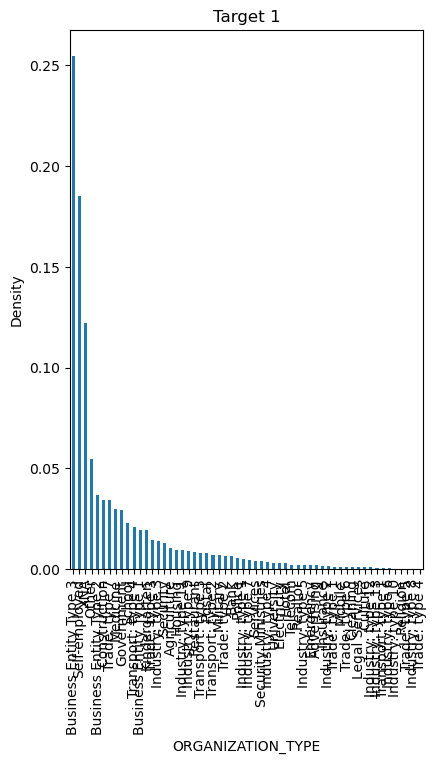



____________________________________________________________________________




In [69]:
for col in cat_cols:
    print(f"plot on {col} for Target 0 and 1")
    plt.figure(figsize=[10,7])
    plt.subplot(1,2,1)
    tar_0[col].value_counts(normalize=True).plot.bar()
    plt.title("Target 0")
    plt.xlabel(col)
    plt.ylabel("Density")
    tar_1[col].value_counts(normalize=True).plot.bar()
    plt.title("Target 1")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()
    print("\n\n____________________________________________________________________________\n\n")

### Analysis on AMT_GOODS_PRICE on Target 0 ands 1

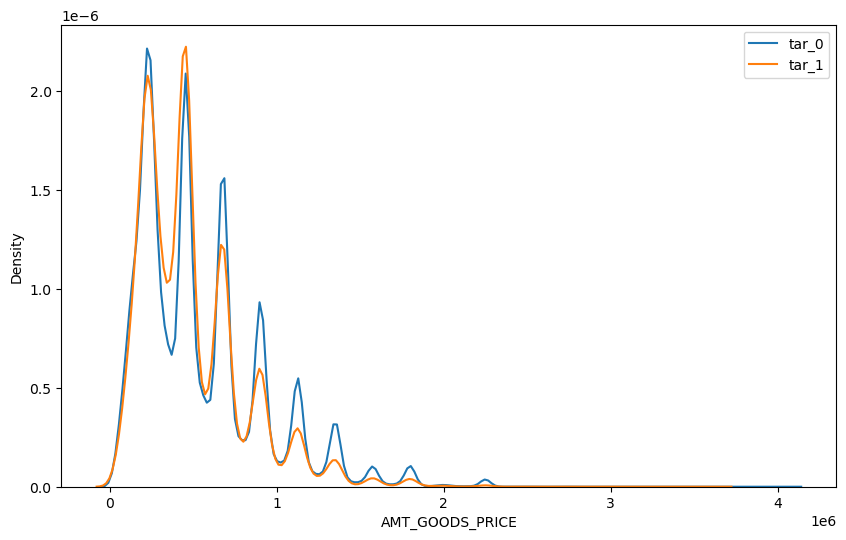

In [70]:
plt.figure(figsize=(10,6))
sns.distplot(tar_0["AMT_GOODS_PRICE"],label="tar_0",hist=False)
sns.distplot(tar_1["AMT_GOODS_PRICE"],label="tar_1",hist=False)
plt.legend()
plt.show()

- Conclusion : The price of the Goods for which loan is given has the same variation for 0 and 1

# Bivariate and MultiVariate Analysis

### Bivariate Analysis between WEEKDAY_APPR_PROCESS_START VS hour_appr_process_start

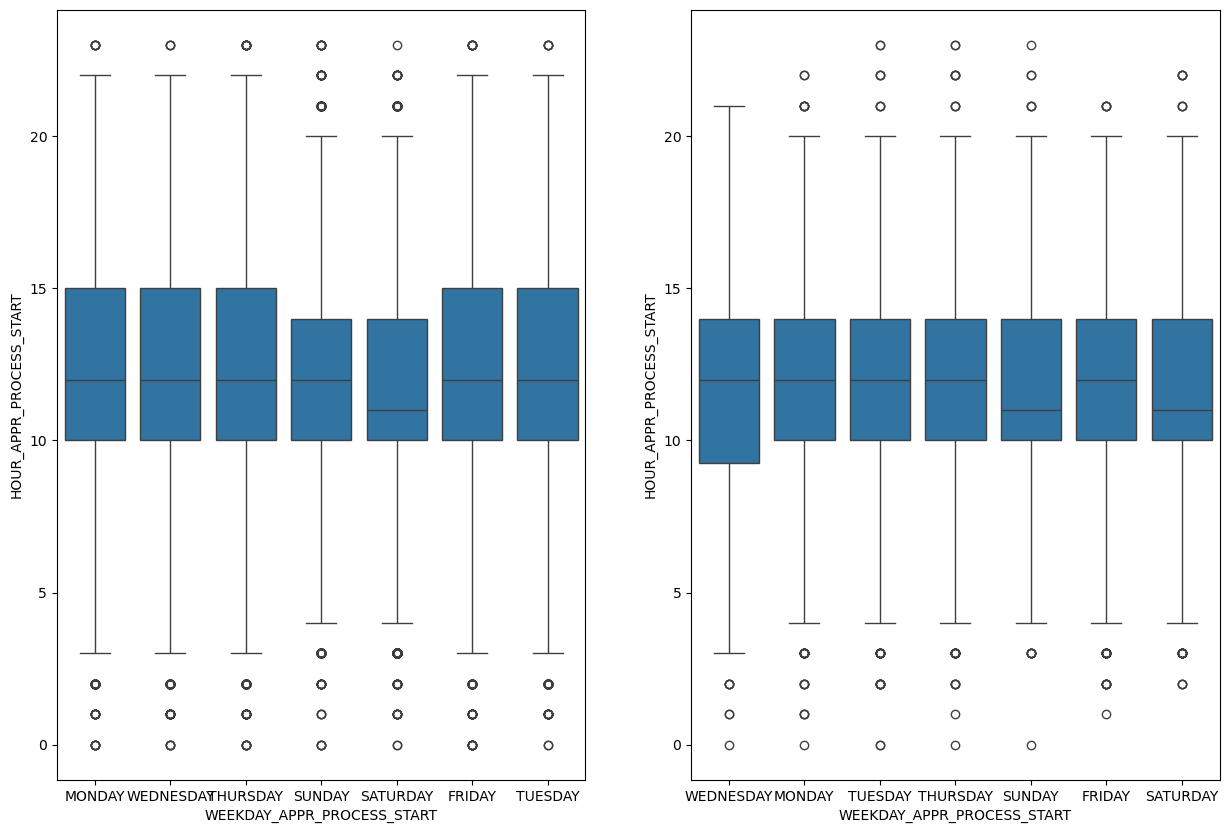

In [71]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x="WEEKDAY_APPR_PROCESS_START",y="HOUR_APPR_PROCESS_START",data=tar_0)
plt.subplot(1,2,2)
sns.boxplot(x="WEEKDAY_APPR_PROCESS_START",y="HOUR_APPR_PROCESS_START",data=tar_1)
plt.show()

-Conclusion : 
1. The bank operates between 10am to 3pm exceptfor Saturday,its between 10am to 2pm
2. We can observe that around 11:30am to 12pm around 50% of Customers visit the branch for loan application on all the days except for saturday where the time is between 10am for both Target 0 and 1.
3. The loan defaulters have applied for the loan between 9:30 am-10am and 2pm where as the applicants who repay the loan on time have applied for the loan between 10am to 3pm

### Bivariate Analysis between AGE_CATEGORY Vs AMT_CREDIT

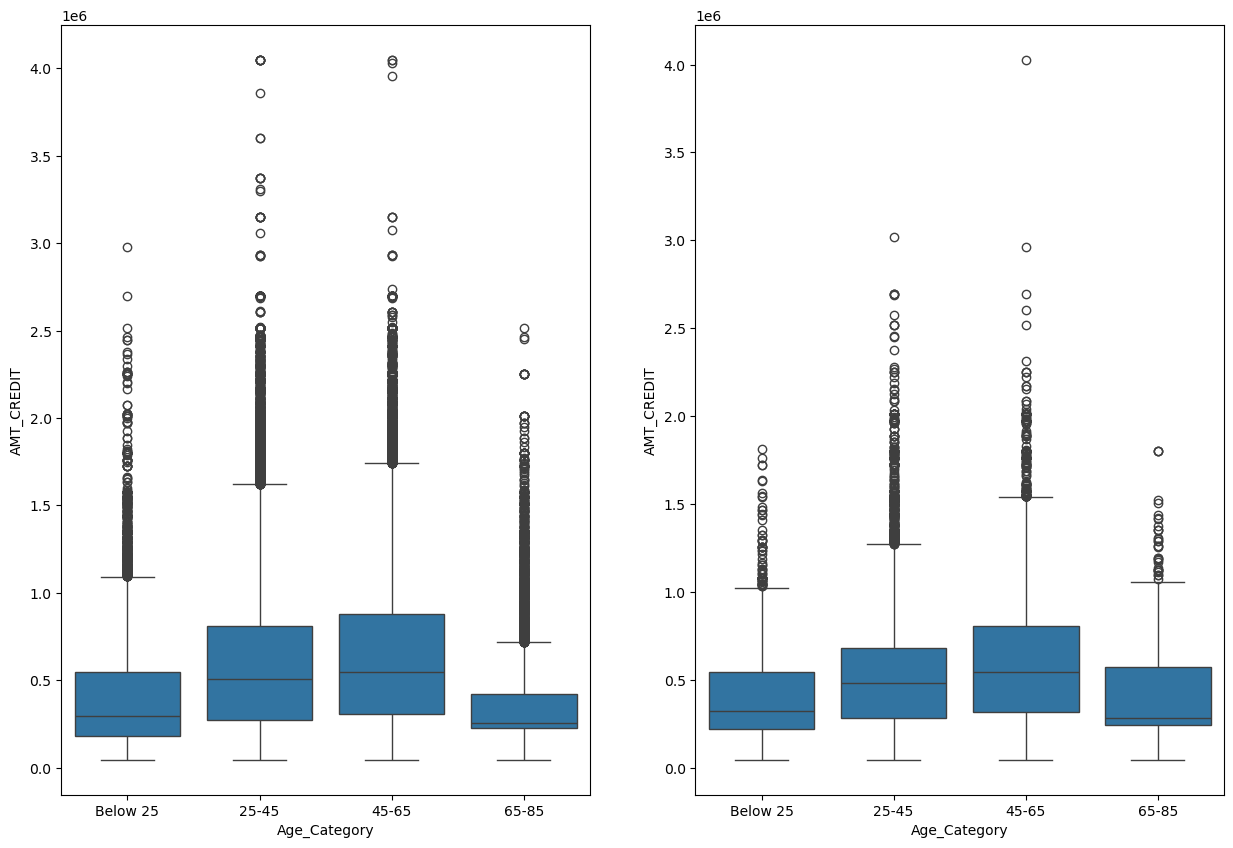

In [72]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
sns.boxplot(x="Age_Category", y="AMT_CREDIT", data=tar_0)

plt.subplot(1,2,2)
sns.boxplot(x="Age_Category", y="AMT_CREDIT", data=tar_1)

plt.show()

- Conclusion : 
1. The applicants between age group 25 to 65 have Credit amount of the loan less than 2500000 and are able to reply the loan properly
2. The applicants with less than 100000 Credit amount are with age group greater than 65 may be considereed as loan defaulters
3. Most applicants who have Credit amount of the loan less than 1700000 are loan defaulters with 25 and less age

##### Pair Plot of Amount Columns for Target 0

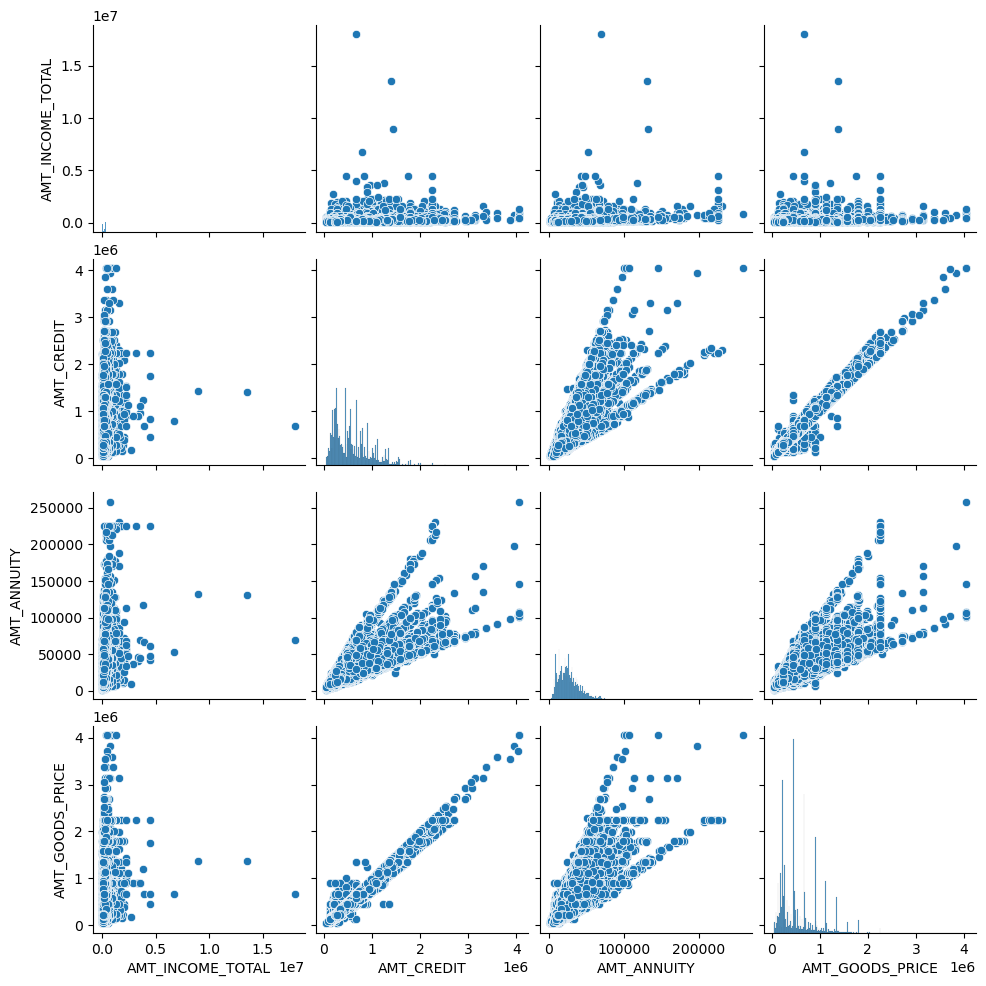

In [73]:
sns.pairplot(tar_0[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]])
plt.show()

- Conclusion : 
1. AMT_CREDIT Increases or varies linearly with AMT_GOODS_PRICE_ and AMT_CREDIT Increases with AMT_ANNUITY
2. AMT_ANNUITY Increases with increase in AMT_GOODS_PRICE and AMT_Credit
3. AMT_GOODS_PRICE Increasewith increases in AMT_Credit and AMT_ANNUITY
4. AMT_INCOME_TOTAL has a drastic increase with slight increase in AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE

#### Pair plot of Amount Columns for Target 1

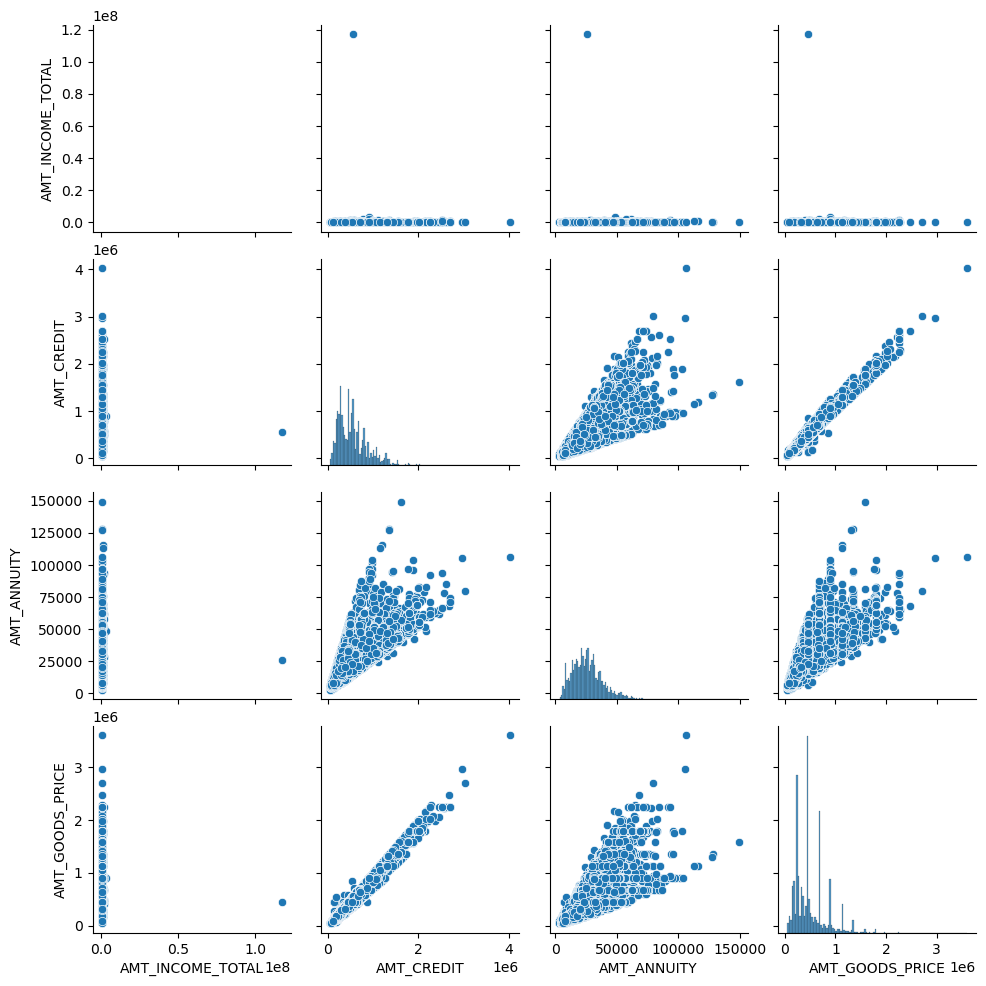

In [74]:
sns.pairplot(tar_1[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]])
plt.show()

- Conclusion :
- 1.AMT_CREDIT Increases or varies linearly with AMT_GOODS_PRICE_ and AMT_CREDIT Increases with AMT_ANNUITY
- 2.AMT_ANNUITY Increases with increase in AMT_GOODS_PRICE and AMT_Credit
- 3.AMT_GOODS_PRICE Increasewith increases in AMT_Credit and AMT_ANNUITY
- 4.AMT_INCOME_TOTAL has a drastic increase with slight increase in AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE

### Co-Relation Between Numerical Columns

In [75]:
corr_data=app_df[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","YEARS_BIRTH","YEARS_EMPLOYED","YEARS_REGISTRATION","YEARS_ID_PUBLISH"]]
corr_data.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_BIRTH  \
0          202500.0    406597.5      24700.5         351000.0           26   
1          270000.0   1293502.5      35698.5        1129500.0           47   
2           67500.0    135000.0       6750.0         135000.0           53   
3          135000.0    312682.5      29686.5         297000.0           53   
4          121500.0    513000.0      21865.5         513000.0           55   

   YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  
0               1                  10                 5  
1               3                   3                 0  
2               0                  11                 7  
3               8                  27                 6  
4               8                  12                 9

In [76]:
corr_data.corr()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL            1.000000    0.156870     0.191657   
AMT_CREDIT                  0.156870    1.000000     0.770127   
AMT_ANNUITY                 0.191657    0.770127     1.000000   
AMT_GOODS_PRICE             0.159632    0.986734     0.774837   
YEARS_BIRTH                -0.027239    0.055373    -0.009519   
YEARS_EMPLOYED             -0.063837   -0.064321    -0.102849   
YEARS_REGISTRATION         -0.027882   -0.009590    -0.038487   
YEARS_ID_PUBLISH           -0.008459    0.006942    -0.011376   

                    AMT_GOODS_PRICE  YEARS_BIRTH  YEARS_EMPLOYED  \
AMT_INCOME_TOTAL           0.159632    -0.027239       -0.063837   
AMT_CREDIT                 0.986734     0.055373       -0.064321   
AMT_ANNUITY                0.774837    -0.009519       -0.102849   
AMT_GOODS_PRICE            1.000000     0.053449       -0.062193   
YEARS_BIRTH                0.053449     1.000000        0.623745   
YEARS_EMPLOYED            -0.062193     0.623745        1.000000   
YEARS_REGISTRATION        -0.011518     0.331856        0.214652   
YEARS_ID_PUBLISH           0.009647     0.272054        0.274644   

                    YEARS_REGISTRATION  YEARS_ID_PUBLISH  
AMT_INCOME_TOTAL             -0.027882         -0.008459  
AMT_CREDIT                   -0.009590          0.006942  
AMT_ANNUITY                  -0.038487         -0.011376  
AMT_GOODS_PRICE              -0.011518          0.009647  
YEARS_BIRTH                   0.331856          0.272054  
YEARS_EMPLOYED                0.214652          0.274644  
YEARS_REGISTRATION            1.000000          0.101831  
YEARS_ID_PUBLISH              0.101831          1.000000

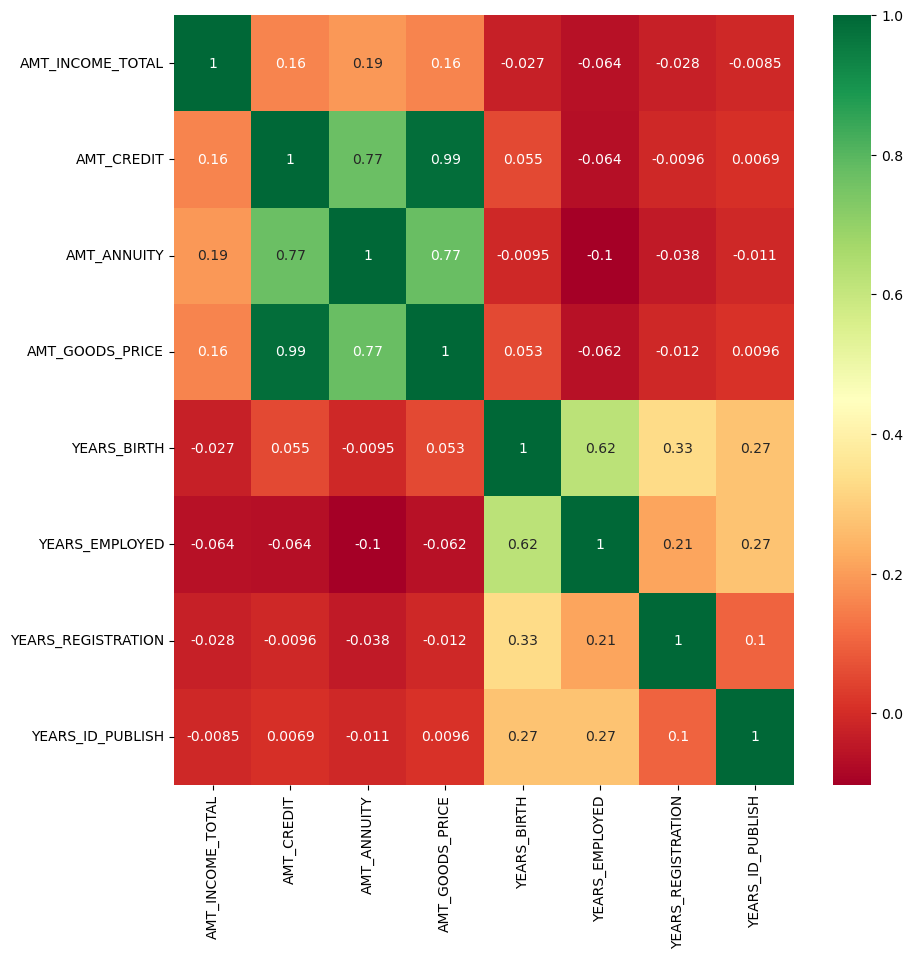

In [77]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data.corr(),annot=True,cmap="RdYlGn")
plt.show()

- Conclusion :
1. AMT_INCOME_TOTAL - It has a positive correlation index of 0.16,019,016 with AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE respectively.
2. AMT_CREDIT - It has negative correlation index of 0.1 with YEARS_EMPLOYED and positive correlation index of 0.99,0.77 with AMT_GOODS_PRICE,AMT_ANNUITY respectively
3. AMT_ANNUITY - It has negative correlation index of 0.1 with YEARS_EMPLOYED and positive correlation index of 0.77 with AMT_CREDIT
4. AMT_GOODS_PRICE - It has a positive correlation with AMT_CREDIT,AMT_ANNUITY
5. YEARS_BIRTH - It has a positive correlation with YEARS_EMPLOYED,AMT_GOODS_PRICE and negative correlation with AMT_ANNUITY,AMT_INCOME_TOTAL
6. YEARS_EMPLOYED - It has negative correlation index of 0.1 with AMT_ANNUITY and has a positive correlation with YEARS_REGISTRATION,YEARS_ID_PUBLISH.
7. YEARS_REGISTRATION - It has a positive correlation with YEARS_ID_PUBLISH,YEARS_BIRTH,YEARS_EMPLOYED
8. YEARS_ID_PUBLISH - It has a positive correlation with YEARS_REGISTRATION and negative correlation with AMT_INCOME_TOTAL,AMT_ANNUITY
9. YEARS_LAST_PHONE_CHANGE - It has negative correlation with YEARS_EMPLOYED and positive correlation with AMT_GOODS_PRICE,YEARS_ID_PUBLISH 

### Split ther NUmerical variables basedf on Target 0 and 1 to find the co-relation

In [78]:
corr_data_0=tar_0[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_GOODS_PRICE","YEARS_BIRTH","YEARS_EMPLOYED","YEARS_REGISTRATION","YEARS_ID_PUBLISH"]]
corr_data_0.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_GOODS_PRICE  YEARS_BIRTH  YEARS_EMPLOYED  \
1          270000.0   1293502.5        1129500.0           47               3   
2           67500.0    135000.0         135000.0           53               0   
3          135000.0    312682.5         297000.0           53               8   
4          121500.0    513000.0         513000.0           55               8   
5           99000.0    490495.5         454500.0           47               4   

   YEARS_REGISTRATION  YEARS_ID_PUBLISH  
1                   3                 0  
2                  11                 7  
3                  27                 6  
4                  12                 9  
5                  13                 1

In [79]:
corr_data_1=tar_1[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_GOODS_PRICE","YEARS_BIRTH","YEARS_EMPLOYED","YEARS_REGISTRATION","YEARS_ID_PUBLISH"]]
corr_data_1.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_GOODS_PRICE  YEARS_BIRTH  \
0           202500.0    406597.5         351000.0           26   
26          112500.0    979992.0         702000.0           52   
40          202500.0   1193580.0         855000.0           49   
42          135000.0    288873.0         238500.0           37   
81           81000.0    252000.0         252000.0           69   

    YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  
0                1                  10                 5  
26               7                  18                 5  
40               3                   3                 2  
42              10                   0                12  
81            1025                  15                11

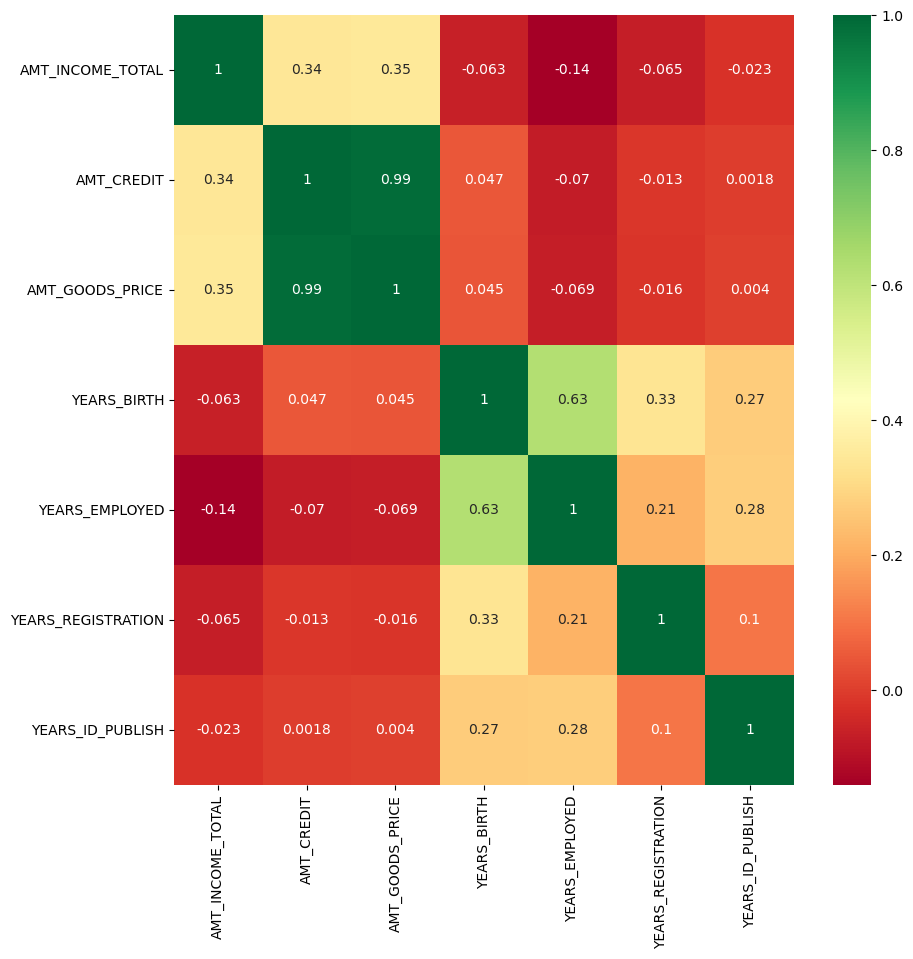

In [80]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data_0.corr(),annot=True,cmap="RdYlGn")
plt.show()

- Conclusion : 
1. AMT_INCOME_TOTAL - It has a positive correlation index of 0.34,0.42,0.35 with AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE respectively and Negative with most of the other Year Column
2. AMT_CREDIT - It has a strong positive correlation index of 0.99,0.77 with AMT_GOODS_PRICE,AMT_ANNUITY respectively
3. AMT_ANNUITY - It has a positive correlation index of 0.77,0.78 with AMT_CREDIT,AMT_GOODS_PRICE respectively and negative with most of the other Year columns
4. AMT_GOODS_PRICE - It has  a strong positive correlation index 0.78,0.99 with AMT_ANNUITY,AMT_CREDIT

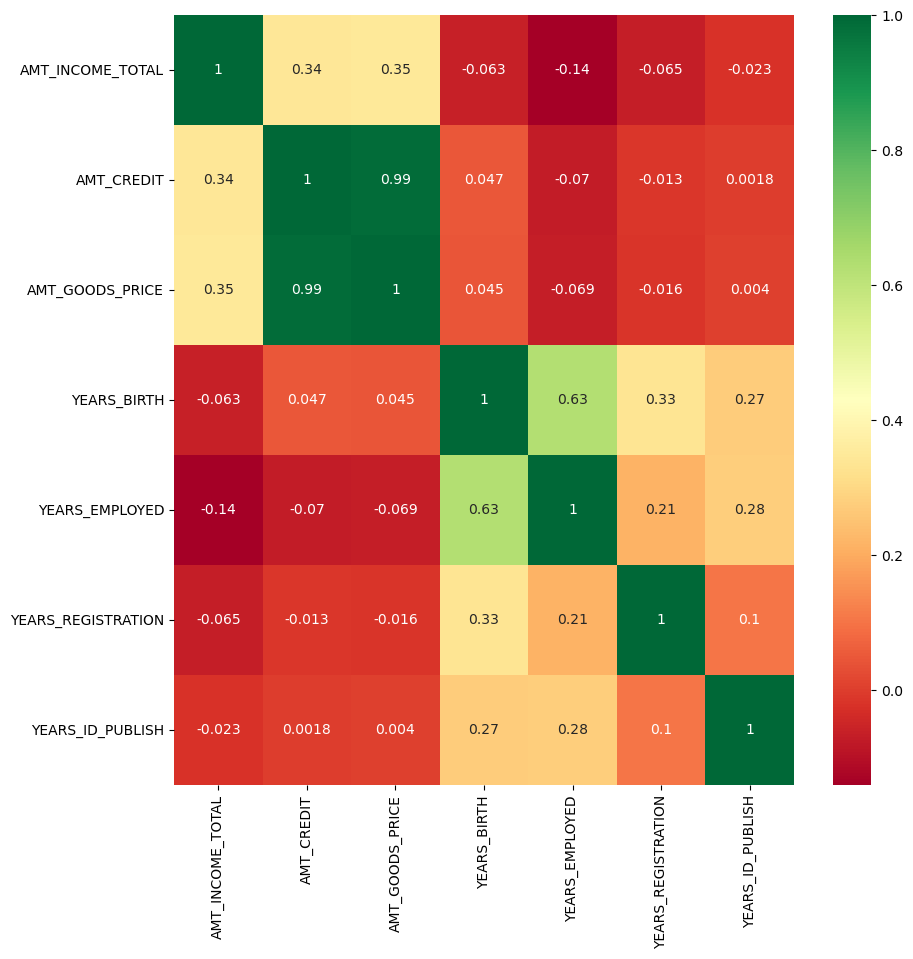

In [81]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data_0.corr(),annot=True,cmap="RdYlGn")
plt.show()

### Conclusion :
1. AMT_INCOME_TOTAL- It is less correlated with AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE respectively.
2. AMT_CREDIT - It has a strong positive correlation index of 0.98,0.75 with AMT_GOODS_PRICE,AMT_ANNUITY respectively and also positive correlation with other columns
3. AMT_ANNUITY - It has positive correlation index of 0.75 with AMT_CREDIT,AMT_GOODS_PRICE,and negative with YEAR_EMPLOYED,YEAR_REGISTRATION.
4. AMT_GOODS_PRICE - It has a strong positive correlation index 0.75,0.99 with AMT_ANNUITY,AMT_CREDIT and weak positive correlation with other Year_columns

### Read Previous Application CSV

In [87]:
papp_data = pd.read_csv("previous_application.csv")
papp_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

### Data Inspectation on previous application dataset
#### Get into info and set the previous dataset

In [88]:
papp_data.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   4999 non-null   int64  
 1   SK_ID_CURR                   4999 non-null   int64  
 2   NAME_CONTRACT_TYPE           4999 non-null   object 
 3   AMT_ANNUITY                  4015 non-null   float64
 4   AMT_APPLICATION              4999 non-null   float64
 5   AMT_CREDIT                   4999 non-null   float64
 6   AMT_DOWN_PAYMENT             2745 non-null   float64
 7   AMT_GOODS_PRICE              4002 non-null   float64
 8   WEEKDAY_APPR_PROCESS_START   4999 non-null   object 
 9   HOUR_APPR_PROCESS_START      4999 non-null   int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  4999 non-null   object 
 11  NFLAG_LAST_APPL_IN_DAY       4999 non-null   int64  
 12  RATE_DOWN_PAYMENT            2745 non-null   float64
 13  RATE_INTEREST_PRIM

In [103]:
papp_data.size

184963

In [106]:
papp_data.shape

(4999, 37)

Data Quality Check

### Check percentage of null values in the application

In [107]:
papp_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    19.683937
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               45.089018
AMT_GOODS_PRICE                19.943989
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              45.089018
RATE_INTEREST_PRIMARY          99.519904
RATE_INTEREST_PRIVILEGED       99.519904
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                48.669734
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [110]:
percentage=48
threshold_p = int(((100-percentage)/100)*papp_data.shape[0]+1)
papp_df=papp_data.dropna(axis=1,thresh=threshold_p)
papp_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT NAME_CASH_LOAN_PURPOSE  \
0                       1                0.0                    XAP   
1                       1                NaN                    XNA   
2                       1                NaN                    XNA   
3                       1                NaN                    XNA   
4                       1                NaN                Repairs   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved            -73  Cash through the bank   
1             Approved           -164                    XNA   
2             Approved           -301  Cash through the bank   
3             Approved           -512  Cash through the bank   
4              Refused           -781  Cash through the bank   

  CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
0                XAP         Repeater              Mobile            POS   
1                XAP         Repeater                 XNA           Cash   
2                XAP         Repeater                 XNA           Cash   
3                XAP         Repeater                 XNA           Cash   
4                 HC         Repeater                 XNA           Cash   

  NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  \
0               XNA             Country-wide                35   
1            x-sell           Contact center                -1   
2            x-sell  Credit and cash offices                -1   
3            x-sell  Credit and cash offices                -1   
4           walk-in  Credit and cash offices                -1   

  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
0         Connectivity         12.0           middle   
1                  XNA         36.0       low_action   
2                  XNA         12.0             high   
3                  XNA         12.0           middle   
4                  XNA         24.0             high   

        PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0  POS mobile with interest            365243.0           -42.0   
1          Cash X-Sell: low            365243.0          -134.0   
2         Cash X-Sell: high            365243.0          -271.0   
3       Cash X-Sell: middle            365243.0          -482.0   
4         Cash Street: high                 NaN             NaN   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                      300.0          -42.0             -37.0   
1                      916.0       365243.0          365243.0   
2                       59.0       365243.0          365243.0   
3                     -152.0         -182.0 

In [113]:
papp_df.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    19.683937
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               45.089018
AMT_GOODS_PRICE                19.943989
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              45.089018
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDU

In [114]:
papp_df.shape

(4999, 34)

### Impute the missing values
##### Check the dtypes of missing values in application dataset before imputing values

In [116]:
# app_df["YEARS_BIRTH"]=app_df.DAYS_BIRTH.apply(lambda x: int(x//356))
# app_df["YEARS_EMPLOYED"]=app_df.DAYS_EMPLOYED.apply(lambda x: int(x//356))
# app_df["YEARS_REGISTRATION"]=app_df.DAYS_REGISTRATION.apply(lambda x: int(x//356))
# app_df["YEARS_ID_PUBLISH"]=app_df.DAYS_ID_PUBLISH.apply(lambda x: int(x//356))
# app_df["YEARS_LAST_PHONE_CHANGE"]=app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: int(x//356))

In [120]:
for col in papp_df.columns:
    if papp_df[col].dtypes == np.int64 or papp_df[col].dtypes == np.float64:
        papp_df[col] = papp_df[col].apply(lambda x:abs(x))

### Validate if any null values present in the dataset

In [121]:
null_cols=list(papp_df.columns[papp_df.isna().any()])
len(null_cols)

11

In [122]:
papp_df.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    19.683937
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               45.089018
AMT_GOODS_PRICE                19.943989
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              45.089018
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDU

### Bining of Continous Variables
#### Bining AMT_CREDIT Column

In [126]:
papp_df.AMT_CREDIT.describe()

count    4.999000e+03
mean     1.714547e+05
std      2.875887e+05
min      0.000000e+00
25%      2.790675e+04
50%      7.480800e+04
75%      1.728022e+05
max      3.020760e+06
Name: AMT_CREDIT, dtype: float64

In [128]:
papp_df["AMT_CREDIT_Category"]=pd.cut(papp_df.AMT_CREDIT,[0,200000,400000,600000,800000,1000000],labels=["very low Credit","Low Credit","Medium Credit","High Credit","very High Credit"])

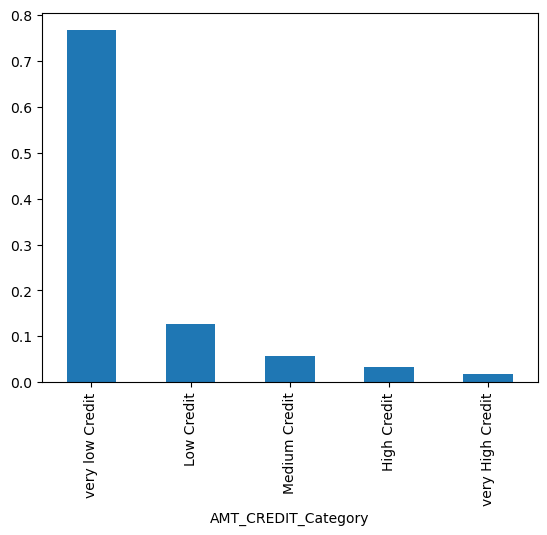

In [130]:
papp_df["AMT_CREDIT_Category"].value_counts(normalize=True).plot.bar()
plt.show()

### Conclusion : 
- The credit amount of the loan for most applicants is either low(200000 to 400000)

In [206]:
papp_df.AMT_GOODS_PRICE

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
4994    NaN
4995    NaN
4996    NaN
4997    NaN
4998    NaN
Name: AMT_GOODS_PRICE, Length: 4999, dtype: category
Categories (5, object): ['Very low price' < 'Low price' < 'Medium Price' < 'High price' < 'Very high price']

In [267]:
papp_df["AMT_GOODS_PRICE_Category"] = pd.cut(papp_df["AMT_GOODS_PRICE"],[0, 0.25, 0.45, 0.65, 0.85, 1],labels=["Very low price", "Low price", "Medium Price", "High price", "Very high price"])


In [268]:
papp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_PREV                   4999 non-null   int64   
 1   SK_ID_CURR                   4999 non-null   int64   
 2   NAME_CONTRACT_TYPE           4999 non-null   object  
 3   AMT_ANNUITY                  4015 non-null   float64 
 4   AMT_APPLICATION              4999 non-null   float64 
 5   AMT_CREDIT                   4999 non-null   float64 
 6   AMT_DOWN_PAYMENT             2745 non-null   float64 
 7   AMT_GOODS_PRICE              0 non-null      category
 8   WEEKDAY_APPR_PROCESS_START   4999 non-null   object  
 9   HOUR_APPR_PROCESS_START      4999 non-null   int64   
 10  FLAG_LAST_APPL_PER_CONTRACT  4999 non-null   object  
 11  NFLAG_LAST_APPL_IN_DAY       4999 non-null   int64   
 12  RATE_DOWN_PAYMENT            2745 non-null   float64 
 13  NAM

In [269]:
papp_data["AMT_GOODS_PRICE"].head(10)


0      17145.0
1     607500.0
2     112500.0
3     450000.0
4     337500.0
5     315000.0
10    270000.0
11    211500.0
12    148500.0
13     53779.5
Name: AMT_GOODS_PRICE, dtype: float64

Null categories: 0
AMT_GOODS_PRICE_Category
Very low price     1002
Medium price        860
Low price           799
High price          755
Very high price     586
Name: count, dtype: int64


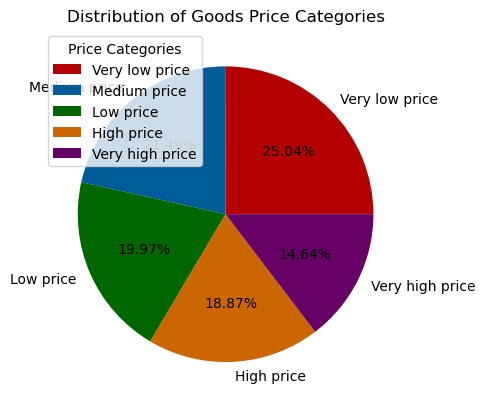

In [270]:
papp_data["AMT_GOODS_PRICE"] = pd.to_numeric(papp_data["AMT_GOODS_PRICE"], errors="coerce")
papp_data = papp_data.dropna(subset=["AMT_GOODS_PRICE"])
try:
    papp_data["AMT_GOODS_PRICE_Category"] = pd.qcut(
        papp_data["AMT_GOODS_PRICE"],
        q=[0, 0.25, 0.45, 0.65, 0.85, 1],
        labels=["Very low price", "Low price", "Medium price", "High price", "Very high price"],
        duplicates="raise"
    )
except ValueError:
    bins = [papp_data["AMT_GOODS_PRICE"].min() - 1,
            papp_data["AMT_GOODS_PRICE"].quantile(0.25),
            papp_data["AMT_GOODS_PRICE"].quantile(0.45),
            papp_data["AMT_GOODS_PRICE"].quantile(0.65),
            papp_data["AMT_GOODS_PRICE"].quantile(0.85),
            papp_data["AMT_GOODS_PRICE"].max()]
    papp_data["AMT_GOODS_PRICE_Category"] = pd.cut(
        papp_data["AMT_GOODS_PRICE"],
        bins=bins,
        labels=["Very low price", "Low price", "Medium price", "High price", "Very high price"],
        include_lowest=True
    )
papp_data = papp_data.dropna(subset=["AMT_GOODS_PRICE_Category"])
print("Null categories:", papp_data["AMT_GOODS_PRICE_Category"].isnull().sum())
print(papp_data["AMT_GOODS_PRICE_Category"].value_counts())
dark_colors = ["#b30000", "#005c99", "#006600", "#cc6600", "#660066"] 
papp_data["AMT_GOODS_PRICE_Category"].value_counts(normalize=True).plot.pie(
    autopct="%1.2f%%",
    ylabel="",
    colors=dark_colors
)
plt.legend(title="Price Categories")
plt.title("Distribution of Goods Price Categories")
plt.show()


### Dat Imbalance Check
##### Dividing Application Data Set with NAME_CONTARACT_STATUS

In [271]:
approved = papp_df[papp_df.NAME_CONTRACT_STATUS == "Approved"]
cancelled = papp_df[papp_df.NAME_CONTRACT_STATUS == "Canceled"]
refused = papp_df[papp_df.NAME_CONTRACT_STATUS == "Refused"]
unused = papp_df[papp_df.NAME_CONTRACT_STATUS == "Unused Offer"]

In [272]:
papp_df.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

NAME_CONTRACT_STATUS
Approved        65.313063
Refused         17.463493
Canceled        15.223045
Unused offer     2.000400
Name: proportion, dtype: float64

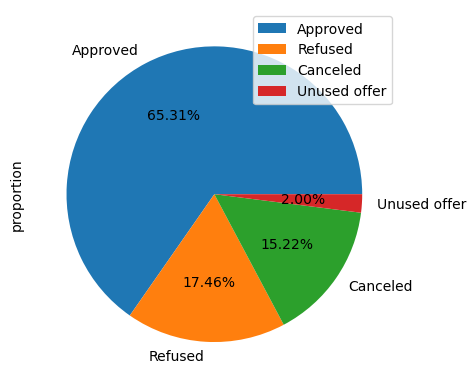

In [273]:
papp_df.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.pie(autopct="%1.2f%%")
plt.legend()
plt.show()

### Conclusion 
- 65.31% of the Applicants have the loan approved,17.46% refused,15.25% Cancelled,2% Unused 

# UNIVARIATE Analysis

In [274]:
cat_cols = list(papp_df.select_dtypes(include=['object']).columns)
num_cols = list(papp_df.select_dtypes(include=['int64', 'float64']).columns)

In [275]:
cat_cols

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [276]:
num_cols

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [277]:
cat_cols=['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [278]:
num_cols=['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

### Plot Categorical Columns

NAME_CONTRACT_TYPE
Consumer loans     52.770554
Cash loans         35.867173
Revolving loans    11.362272
Name: proportion, dtype: float64


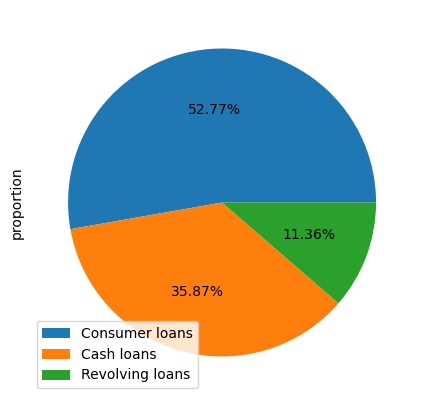

___________________________________________________________________
WEEKDAY_APPR_PROCESS_START
FRIDAY       15.923185
SATURDAY     14.802961
TUESDAY      14.802961
WEDNESDAY    14.682937
THURSDAY     14.662933
MONDAY       14.042809
SUNDAY       11.082216
Name: proportion, dtype: float64


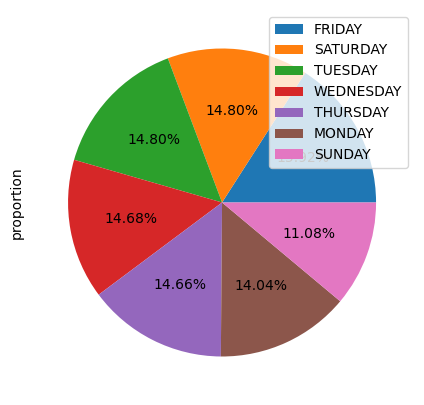

___________________________________________________________________
FLAG_LAST_APPL_PER_CONTRACT
Y    99.479896
N     0.520104
Name: proportion, dtype: float64


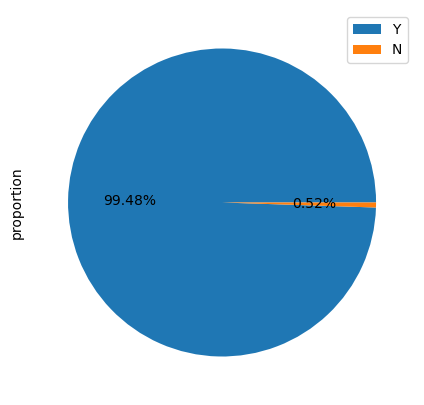

___________________________________________________________________
NAME_CASH_LOAN_PURPOSE
XAP                                 64.132827
XNA                                 32.126425
Repairs                              1.260252
Other                                0.860172
Urgent needs                         0.400080
Everyday expenses                    0.200040
Medicine                             0.160032
Payments on other loans              0.140028
Building a house or an annex         0.100020
Buying a used car                    0.100020
Education                            0.100020
Journey                              0.080016
Buying a new car                     0.080016
Buying a holiday home / land         0.080016
Purchase of electronic equipment     0.060012
Car repairs                          0.040008
Furniture                            0.040008
Buying a home                        0.020004
Buying a garage                      0.020004
Name: proportion, dtype: float64


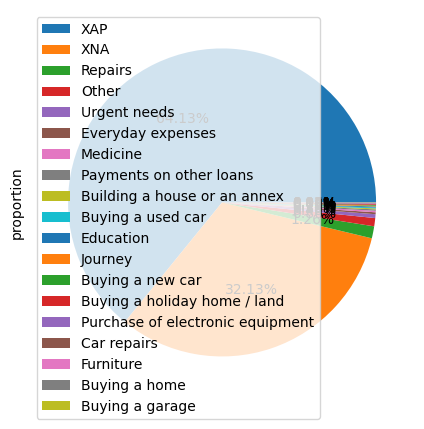

___________________________________________________________________
NAME_CONTRACT_STATUS
Approved        65.313063
Refused         17.463493
Canceled        15.223045
Unused offer     2.000400
Name: proportion, dtype: float64


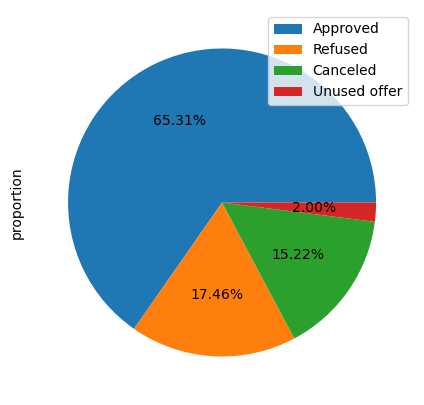

___________________________________________________________________
NAME_PAYMENT_TYPE
Cash through the bank                        64.912983
XNA                                          34.226845
Non-cash from your account                    0.760152
Cashless from the account of the employer     0.100020
Name: proportion, dtype: float64


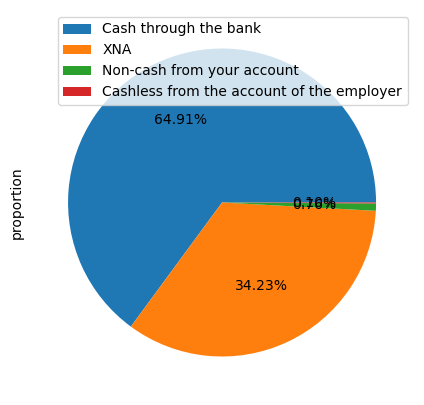

___________________________________________________________________
CODE_REJECT_REASON
XAP       80.536107
HC        10.142028
LIMIT      3.340668
SCO        2.580516
CLIENT     2.000400
SCOFR      0.800160
XNA        0.320064
VERIF      0.280056
Name: proportion, dtype: float64


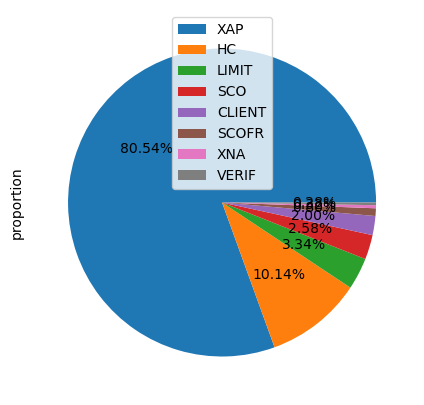

___________________________________________________________________
NAME_CLIENT_TYPE
Repeater     70.734147
New          21.124225
Refreshed     8.081616
XNA           0.060012
Name: proportion, dtype: float64


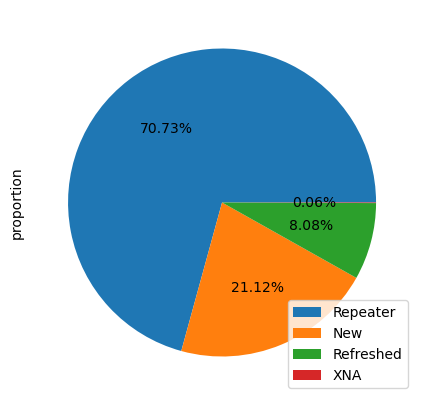

___________________________________________________________________
NAME_GOODS_CATEGORY
XNA                         48.049610
Mobile                      15.923185
Consumer Electronics         9.141828
Computers                    7.941588
Audio/Video                  6.941388
Furniture                    4.180836
Construction Materials       1.820364
Photo / Cinema Equipment     1.680336
Clothing and Accessories     1.540308
Auto Accessories             0.560112
Homewares                    0.380076
Office Appliances            0.280056
Jewelry                      0.260052
Sport and Leisure            0.260052
Gardening                    0.180036
Vehicles                     0.180036
Medical Supplies             0.180036
Medicine                     0.180036
Other                        0.100020
Direct Sales                 0.080016
Education                    0.060012
Fitness                      0.040008
Tourism                      0.040008
Name: proportion, dtype: float64


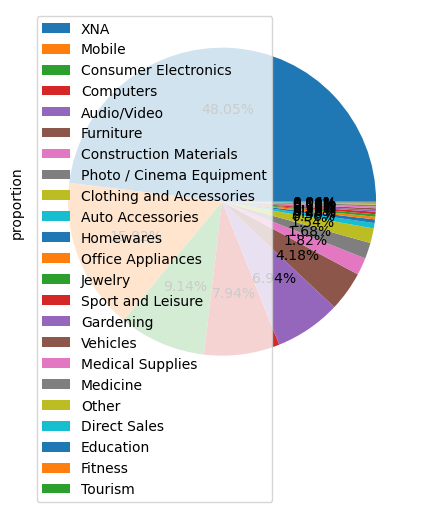

___________________________________________________________________
NAME_PORTFOLIO
POS      49.949990
Cash     21.424285
XNA      19.683937
Cards     8.941788
Name: proportion, dtype: float64


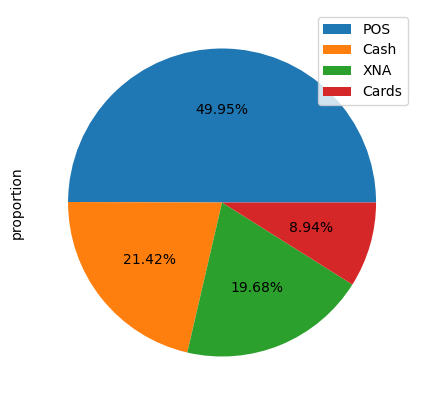

___________________________________________________________________
NAME_PRODUCT_TYPE
XNA        69.633927
x-sell     22.124425
walk-in     8.241648
Name: proportion, dtype: float64


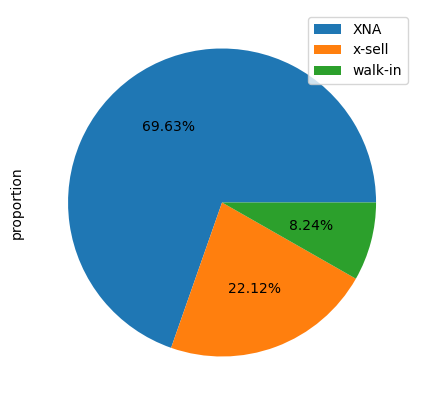

___________________________________________________________________
CHANNEL_TYPE
Country-wide                  35.607121
Credit and cash offices       34.986997
Stone                         15.703141
Regional / Local               8.021604
AP+ (Cash loan)                3.540708
Contact center                 1.320264
Channel of corporate sales     0.800160
Car dealer                     0.020004
Name: proportion, dtype: float64


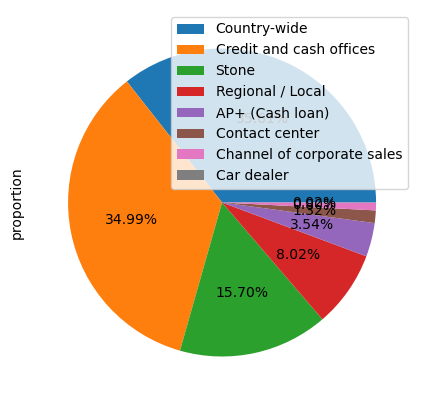

___________________________________________________________________
NAME_SELLER_INDUSTRY
XNA                     40.708142
Consumer electronics    29.745949
Connectivity            19.583917
Furniture                4.400880
Construction             2.140428
Clothing                 1.560312
Industry                 1.140228
Auto technology          0.420084
MLM partners             0.160032
Jewelry                  0.140028
Name: proportion, dtype: float64


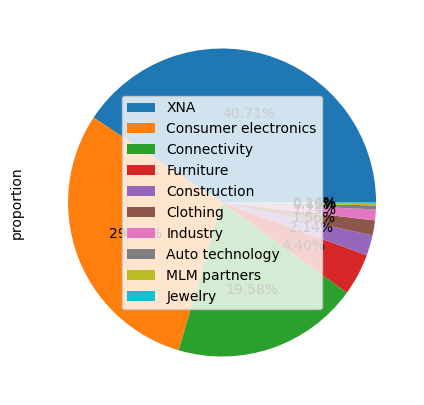

___________________________________________________________________
NAME_YIELD_GROUP
XNA           28.625725
middle        23.584717
high          22.384477
low_normal    19.143829
low_action     6.261252
Name: proportion, dtype: float64


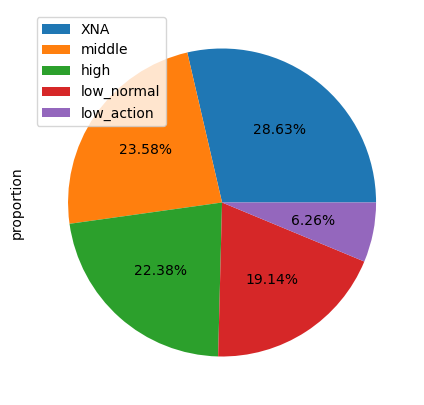

___________________________________________________________________
PRODUCT_COMBINATION
POS household with interest       20.044009
POS mobile with interest          15.323065
Cash                              14.442889
POS industry with interest         7.121424
Card Street                        6.541308
Cash X-Sell: middle                6.381276
POS household without interest     5.901180
Cash X-Sell: low                   5.661132
Card X-Sell                        4.820964
Cash Street: high                  3.160632
Cash X-Sell: high                  2.900580
POS mobile without interest        1.880376
Cash Street: low                   1.740348
Cash Street: middle                1.580316
POS other with interest            1.480296
POS industry without interest      0.920184
POS others without interest        0.100020
Name: proportion, dtype: float64


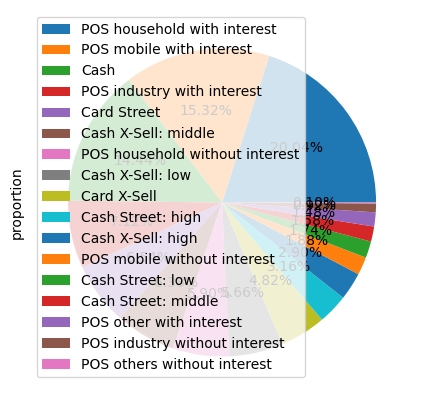

___________________________________________________________________


In [279]:
for col in cat_cols:
    print(papp_df[col].value_counts(normalize=True)*100)
    plt.figure(figsize=[5,5])
    papp_df[col].value_counts(normalize=True).plot.pie(
        labeldistance=None,
        autopct="%1.2f%%"
    )
    plt.legend()
    plt.show()
    print("___________________________________________________________________")


### Conclusion
- 1. NAME_CONTRACT_TYPE – 35.86% of applicants received Cash loans, 52.77% received Consumer loans, 11% received Revolving loans during previous application.
  2. WEEKDAY_APPR_PROCESS_START – All weekdays have almost equal number of previous loan applications.
  3. NAME_CONTRACT_STATUS – 65.31% of applications are approved, 15.22% cancelled, 17.46% refused, and 2% unused.
  4. NAME_PAYMENT_TYPE – 64.91% of payment types are Cash through bank, 34.23% are other modes.
  5. NAME_CLIENT_TYPE – 70% of applicants are Repeaters, 21% are New applicants, 8% are Refreshed applicants.
  6. NAME_SELLER_INDUSTRY – 40% are from other industries, 29% from Consumer electronics, 19% from Connectivity industry.
  7. CHANNEL_TYPE – 34% of channels are Credit and cash offices, 35% are country-wide.
  8. NAME_YIELD_GROUP – Majority of the yield group are “others”.

### Plot on Numerical Columns

99th Percentile 2830194.92
count    4.999000e+03
mean     1.924501e+06
std      5.376372e+05
min      1.000140e+06
25%      1.467528e+06
50%      1.919797e+06
75%      2.390312e+06
max      2.844672e+06
Name: SK_ID_PREV, dtype: float64


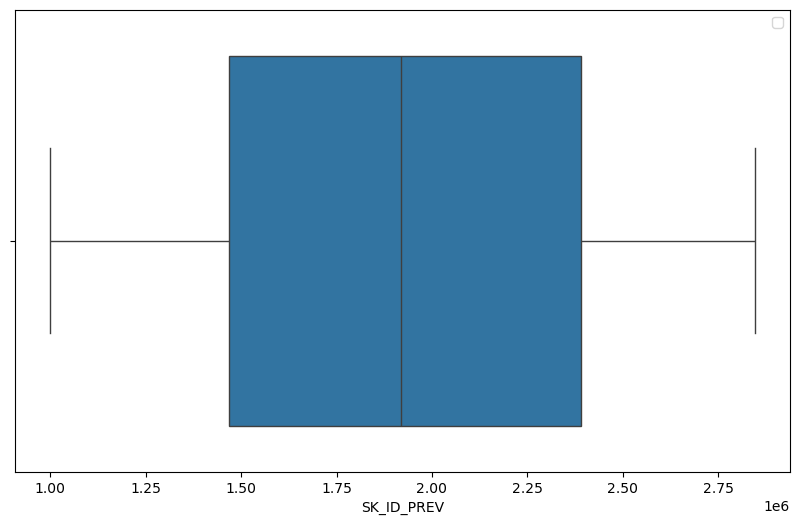

___________________________________________________________________
99th Percentile 453194.22
count      4999.000000
mean     280682.551510
std      101789.604407
min      100067.000000
25%      194804.000000
50%      280088.000000
75%      368552.500000
max      456210.000000
Name: SK_ID_CURR, dtype: float64


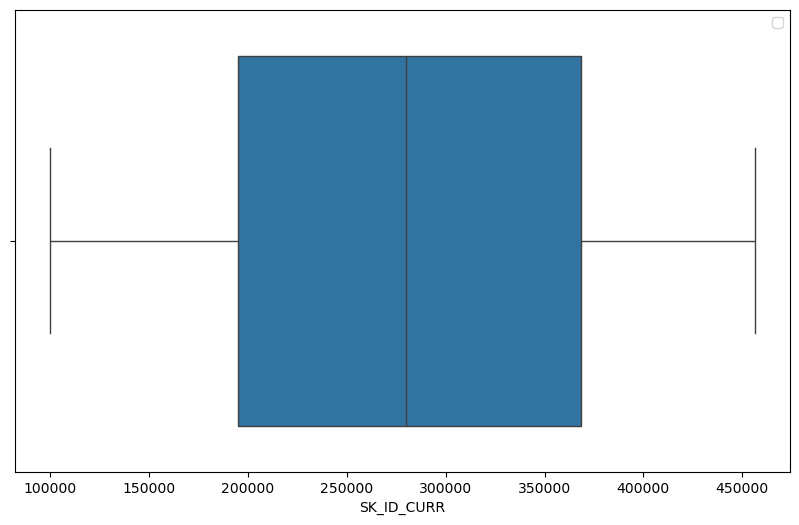

___________________________________________________________________
99th Percentile nan
count      4015.000000
mean      14255.438907
std       13306.593995
min           0.000000
25%        5906.632500
50%       10061.910000
75%       17787.532500
max      204635.790000
Name: AMT_ANNUITY, dtype: float64


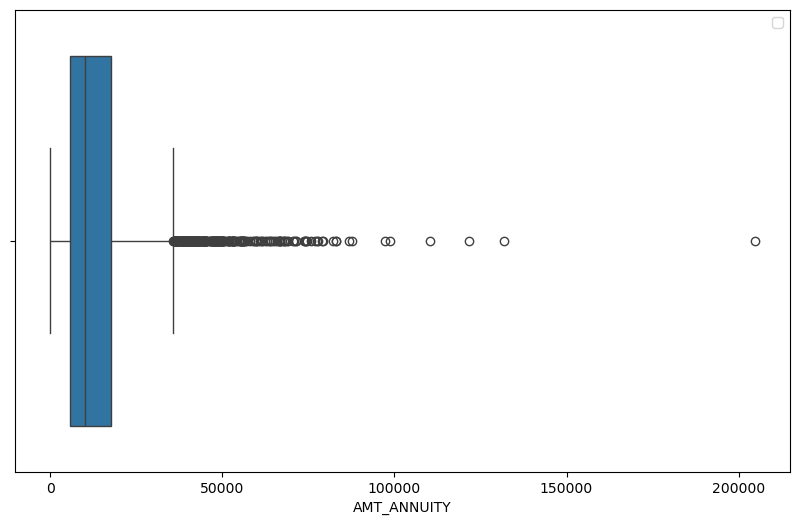

___________________________________________________________________
99th Percentile 1350000.0
count    4.999000e+03
mean     1.530703e+05
std      2.621387e+05
min      0.000000e+00
25%      2.448000e+04
50%      6.750000e+04
75%      1.511775e+05
max      2.700000e+06
Name: AMT_APPLICATION, dtype: float64


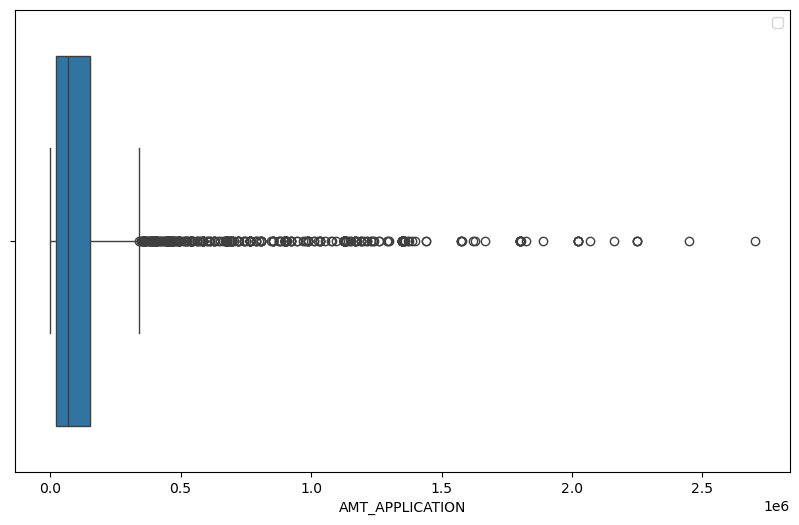

___________________________________________________________________
99th Percentile 1440059.0399999986
count    4.999000e+03
mean     1.714547e+05
std      2.875887e+05
min      0.000000e+00
25%      2.790675e+04
50%      7.480800e+04
75%      1.728022e+05
max      3.020760e+06
Name: AMT_CREDIT, dtype: float64


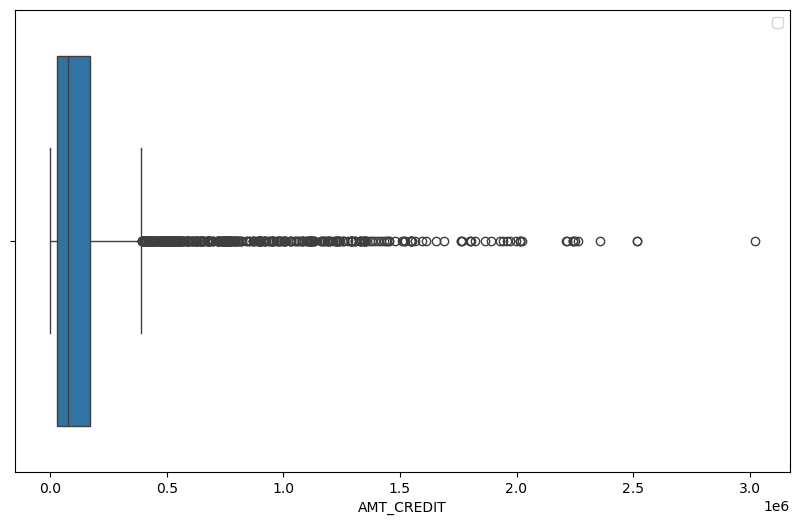

___________________________________________________________________
99th Percentile nan
count      2745.000000
mean       6263.316607
std       14856.615335
min           0.000000
25%           0.000000
50%        1831.140000
75%        7933.500000
max      489600.000000
Name: AMT_DOWN_PAYMENT, dtype: float64


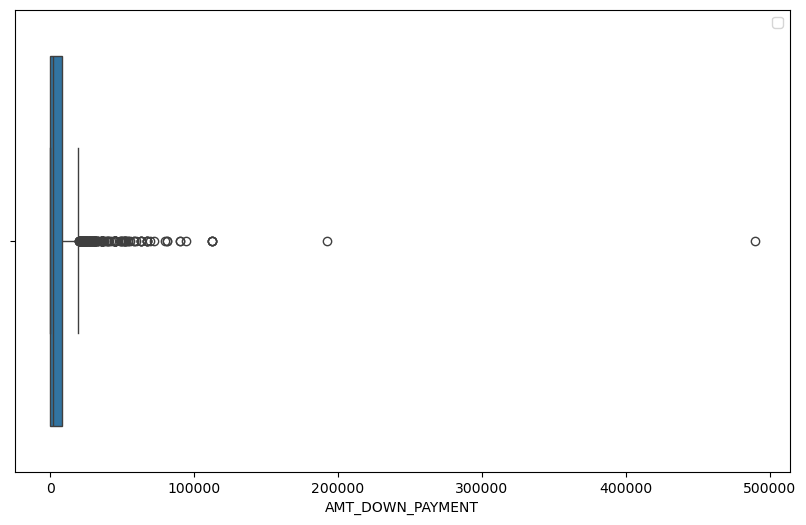

___________________________________________________________________
99th Percentile 20.0
count    4999.00000
mean       12.65213
std         3.29860
min         1.00000
25%        10.00000
50%        13.00000
75%        15.00000
max        22.00000
Name: HOUR_APPR_PROCESS_START, dtype: float64


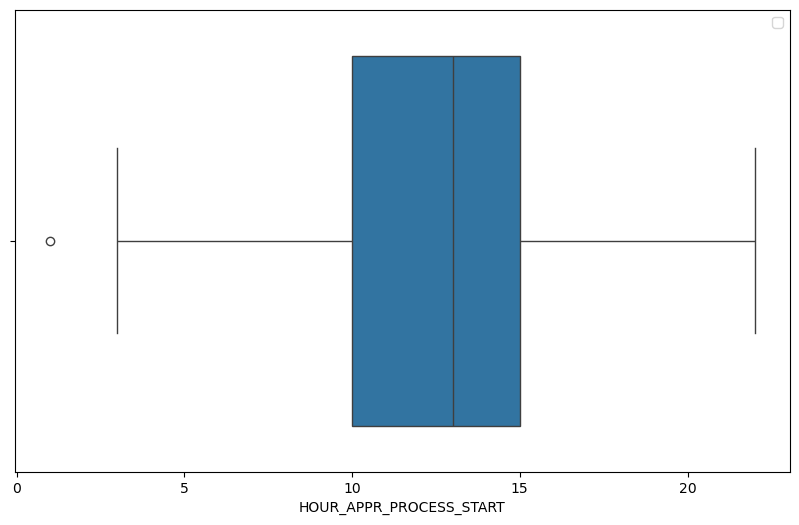

___________________________________________________________________
99th Percentile 1.0
count    4999.000000
mean        0.995999
std         0.063132
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: NFLAG_LAST_APPL_IN_DAY, dtype: float64


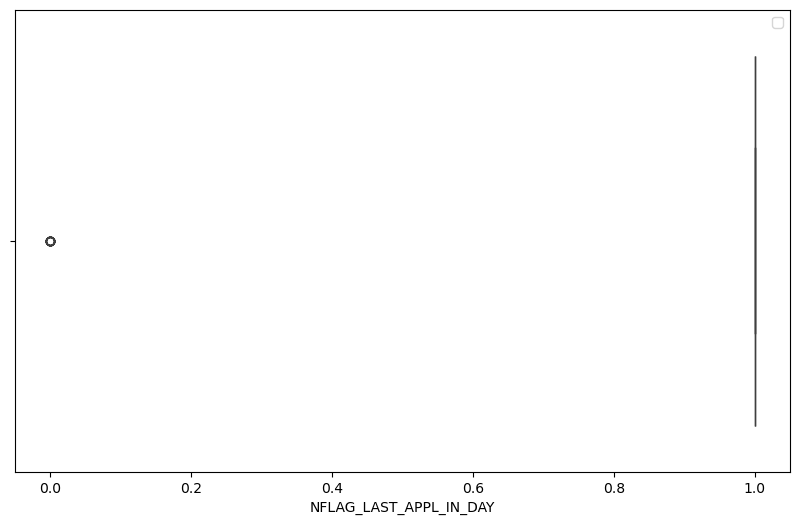

___________________________________________________________________
99th Percentile nan
count    2745.000000
mean        0.079245
std         0.106285
min         0.000000
25%         0.000000
50%         0.057472
75%         0.108915
max         0.818315
Name: RATE_DOWN_PAYMENT, dtype: float64


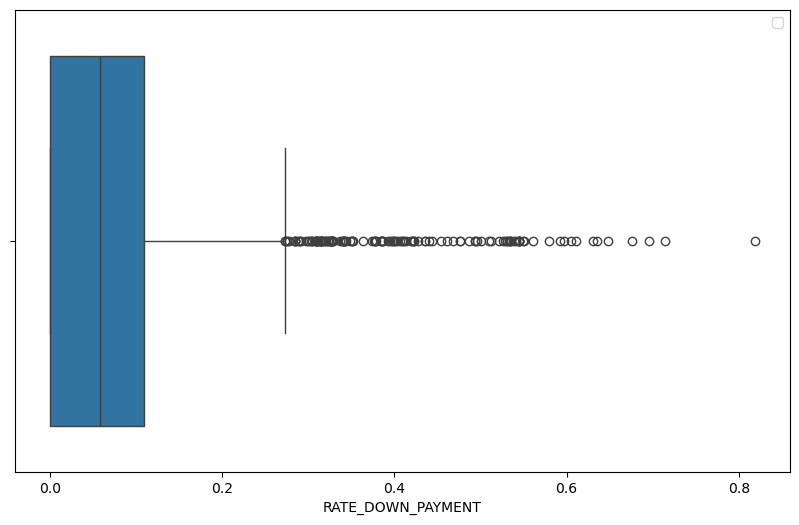

___________________________________________________________________
99th Percentile 2845.079999999998
count    4999.000000
mean      927.626125
std       807.235163
min         2.000000
25%       298.000000
50%       607.000000
75%      1449.000000
max      2920.000000
Name: DAYS_DECISION, dtype: float64


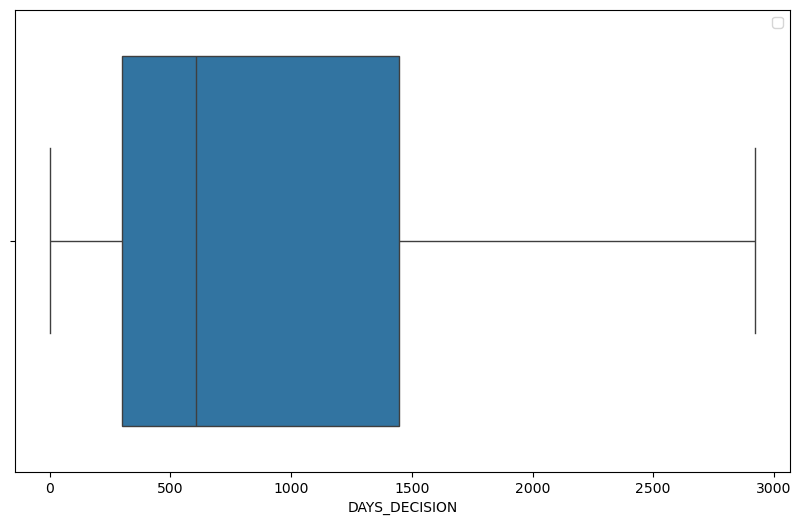

___________________________________________________________________
99th Percentile 3552.0
count    4.999000e+03
mean     1.174743e+03
std      5.658790e+04
min      0.000000e+00
25%      1.000000e+00
50%      2.500000e+01
75%      1.410000e+02
max      4.000000e+06
Name: SELLERPLACE_AREA, dtype: float64


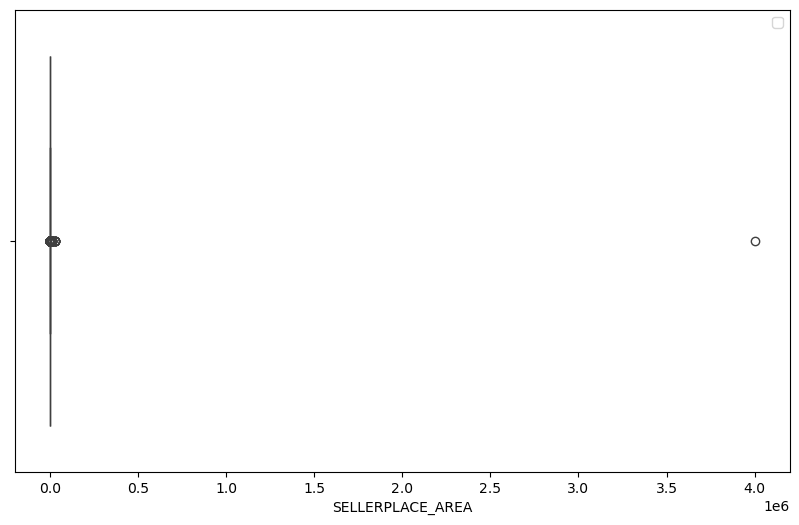

___________________________________________________________________
99th Percentile nan
count    4015.000000
mean       14.376837
std        12.989368
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        60.000000
Name: CNT_PAYMENT, dtype: float64


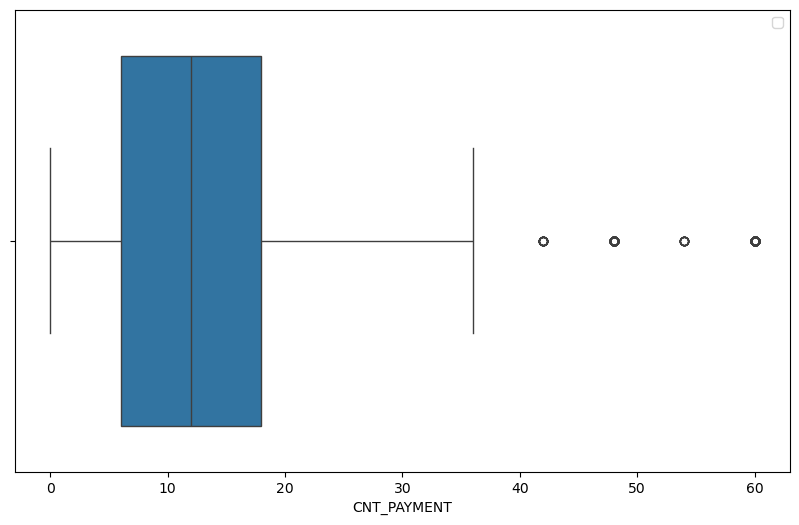

___________________________________________________________________
99th Percentile nan
count      3175.000000
mean     343441.521575
std       86427.330321
min           3.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64


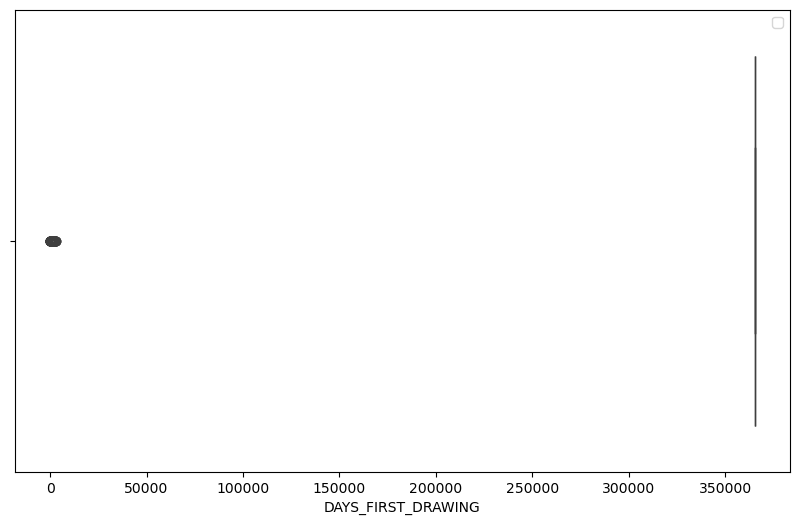

___________________________________________________________________
99th Percentile nan
count      3175.000000
mean      16603.382362
std       73485.352180
min           3.000000
25%         457.000000
50%         913.000000
75%        1905.500000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64


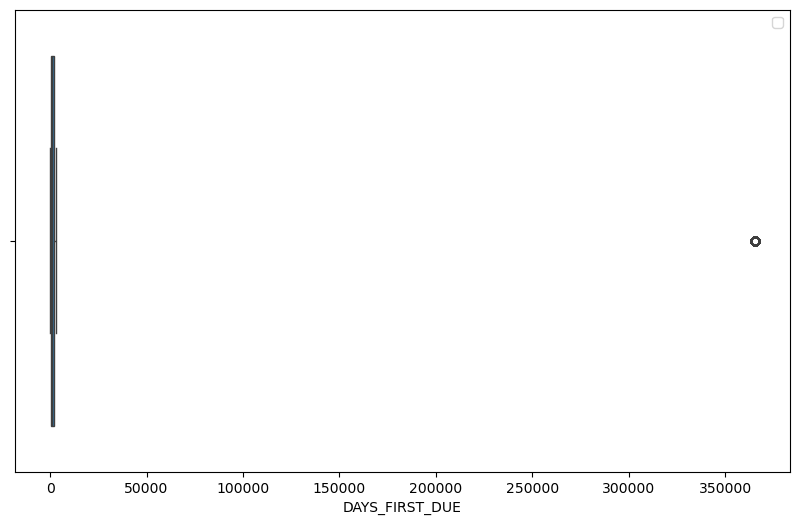

___________________________________________________________________
99th Percentile nan
count      3175.000000
mean      33710.183937
std      104331.430598
min           0.000000
25%         246.000000
50%         757.000000
75%        1792.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64


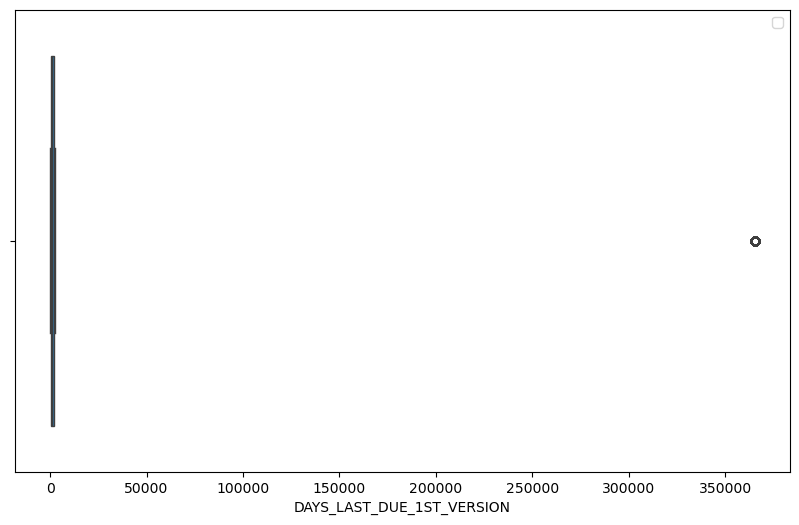

___________________________________________________________________
99th Percentile nan
count      3175.000000
mean      74897.281260
std      146482.427172
min           3.000000
25%         441.000000
50%        1181.000000
75%        2417.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64


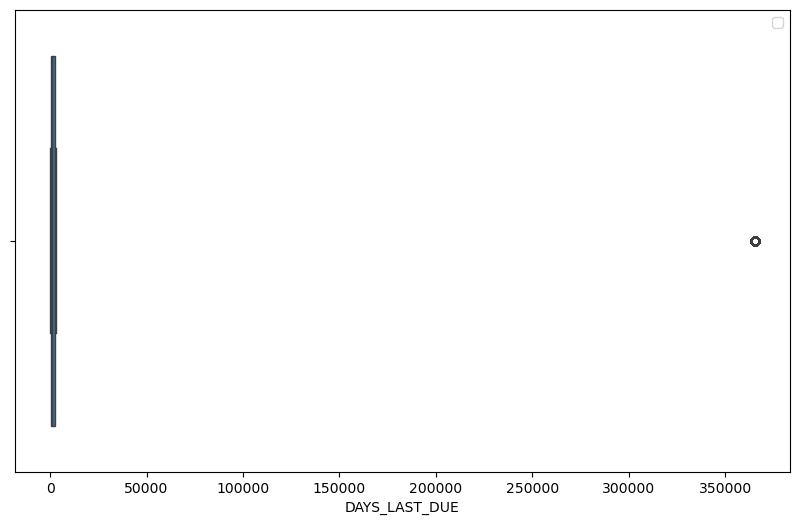

___________________________________________________________________
99th Percentile nan
count      3175.000000
mean      80506.817323
std      150480.855278
min           2.000000
25%         438.000000
50%        1202.000000
75%        2504.500000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64


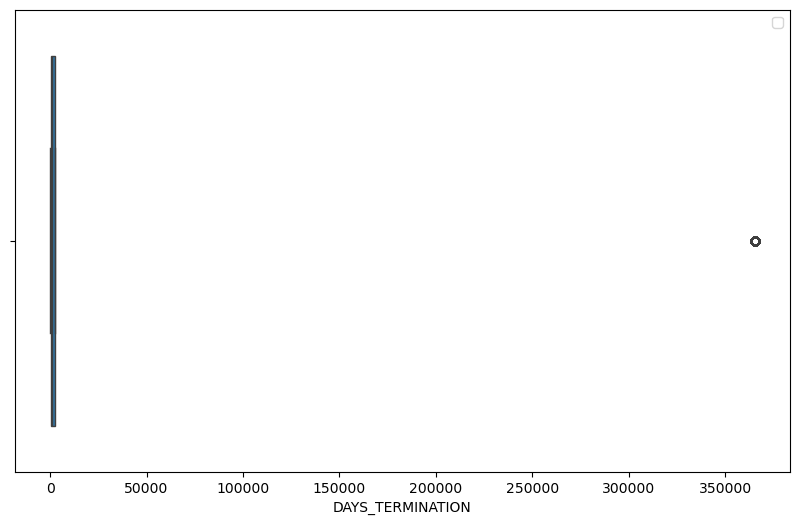

___________________________________________________________________
99th Percentile nan
count    3175.000000
mean        0.271181
std         0.444639
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64


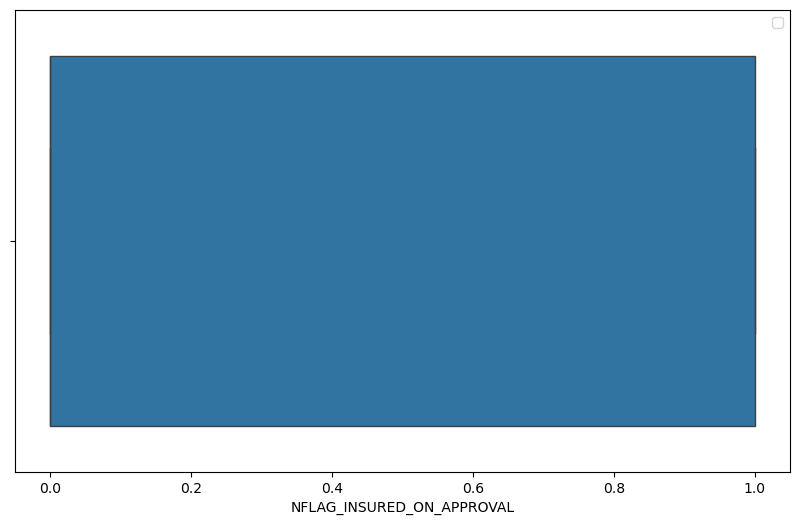

___________________________________________________________________


In [280]:
for col in num_cols:
    print("99th Percentile",np.percentile(papp_df[col],99))
    print(papp_df[col].describe())
    plt.figure(figsize=[10,6])
    sns.boxplot(data=papp_df,x=col)
    plt.legend()
    plt.show()
    print("___________________________________________________________________")


### Conclusion 
- 1.HOUR_APPR_PROCESS_START has few outliers and there is a small difference between mean and median.
- 2. AMT_CREDIT column has a few outliers and there is a huge difference between the 99th percentile and the max value. Also, we could see huge variation in mean and median due to outliers.
  3. AMT_ANNUITY column has a few outliers and there is a huge difference between the 99th percentile and the max value. Also, we could see significant variation in mean and median due to outliers.
  4. AMT_GOODS_PRICE column has a few outliers and there is a huge difference between the 99th percentile and the max value. Also, we could see significant variation in mean and median due to outliers.
  5. AMT_APPLICATION column has a few outliers and there is a huge difference between the 99th percentile and the max value. Also, we could see huge variation in mean and median due to outliers.
  6. CNT_PAYMENT column has few outliers and there is a small difference between mean and median.
  7. DAYS_DECISION has few outliers and there is a small difference between mean and median.

### Bivariate and Multivariate Analysis
##### Bivariate Analysis between WEEKDAY_APPR_PROCESS_START Vs AMT_APPLICATION

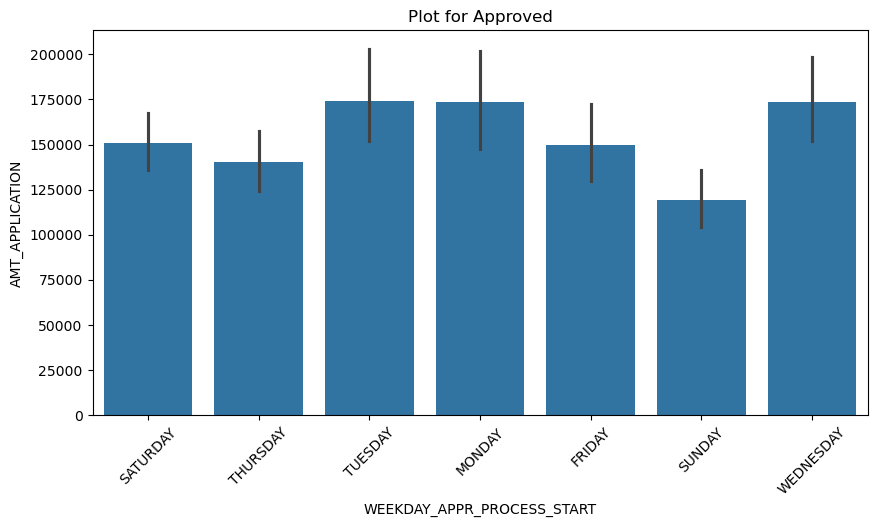

In [303]:
plt.figure(figsize=[10,5])
sns.barplot(x="WEEKDAY_APPR_PROCESS_START",y="AMT_APPLICATION",  data=approved)
plt.title("Plot for Approved")
plt.xticks(rotation=45)
plt.show()


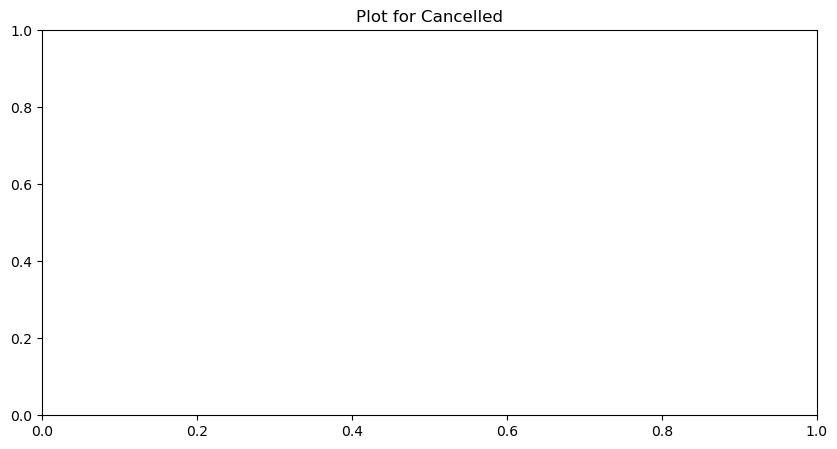

In [298]:
plt.figure(figsize=[10,5])
sns.barplot(x="WEEKDAY_APPR_PROCESS_START",y="AMT_APPLICATION",data=cancelled)
plt.title("Plot for Cancelled")
plt.show()

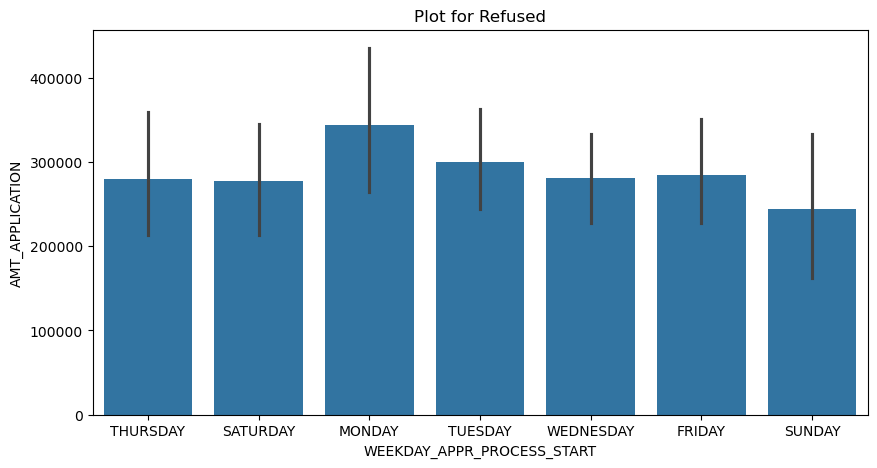

In [306]:
plt.figure(figsize=[10,5])
sns.barplot(x="WEEKDAY_APPR_PROCESS_START",y="AMT_APPLICATION",  data=refused)
plt.title("Plot for Refused")
plt.show()

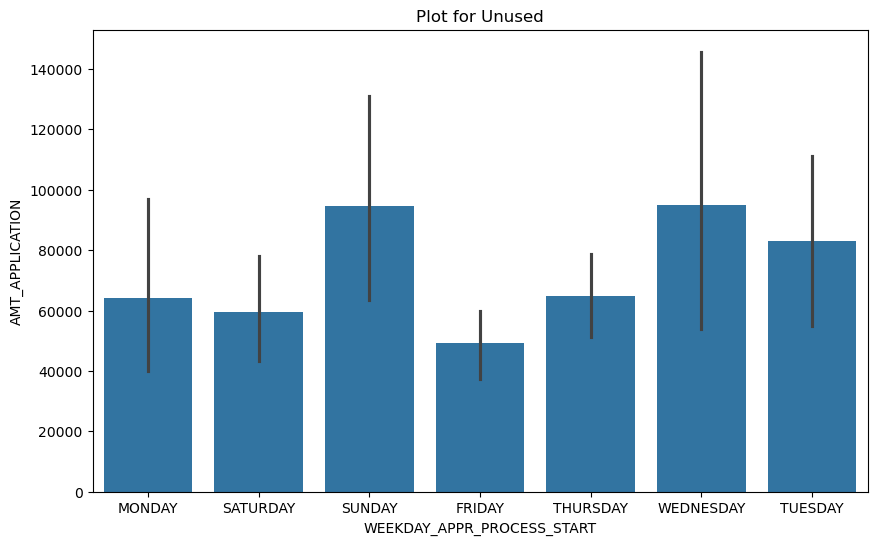

In [300]:
plt.figure(figsize=[10,6])
sns.barplot(x="WEEKDAY_APPR_PROCESS_START",y="AMT_APPLICATION",data= unused)
plt.title("Plot for Unused")
plt.show()

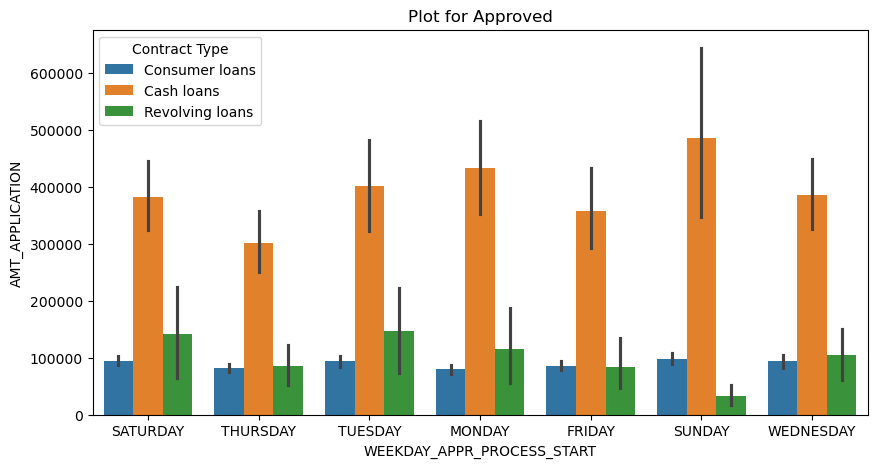

In [307]:
# We can also do this by another way
plt.figure(figsize=[10,5])
sns.barplot(x="WEEKDAY_APPR_PROCESS_START",y="AMT_APPLICATION",hue="NAME_CONTRACT_TYPE",  data=approved)
plt.title("Plot for Approved")
plt.legend(title="Contract Type")
plt.show()


### Conclusion 
- 1.The credit amount of applicants with approved status is highest on Monday and Tuesday, and lowest on Sunday
- 2.The credit amount of applicants with cancelled status is 0 on the other days.
- 3.The credit amount of applicants with rejected status is lowest on Sunday, and higher on Monday .
- 4.The credit amount of applicants with unused offer status is highest on SUNDAY and Wednesday and lowest on Friday

### Bivarient Analysis between AMT_ANNUITY Vs AMT_GOODS_PRICE

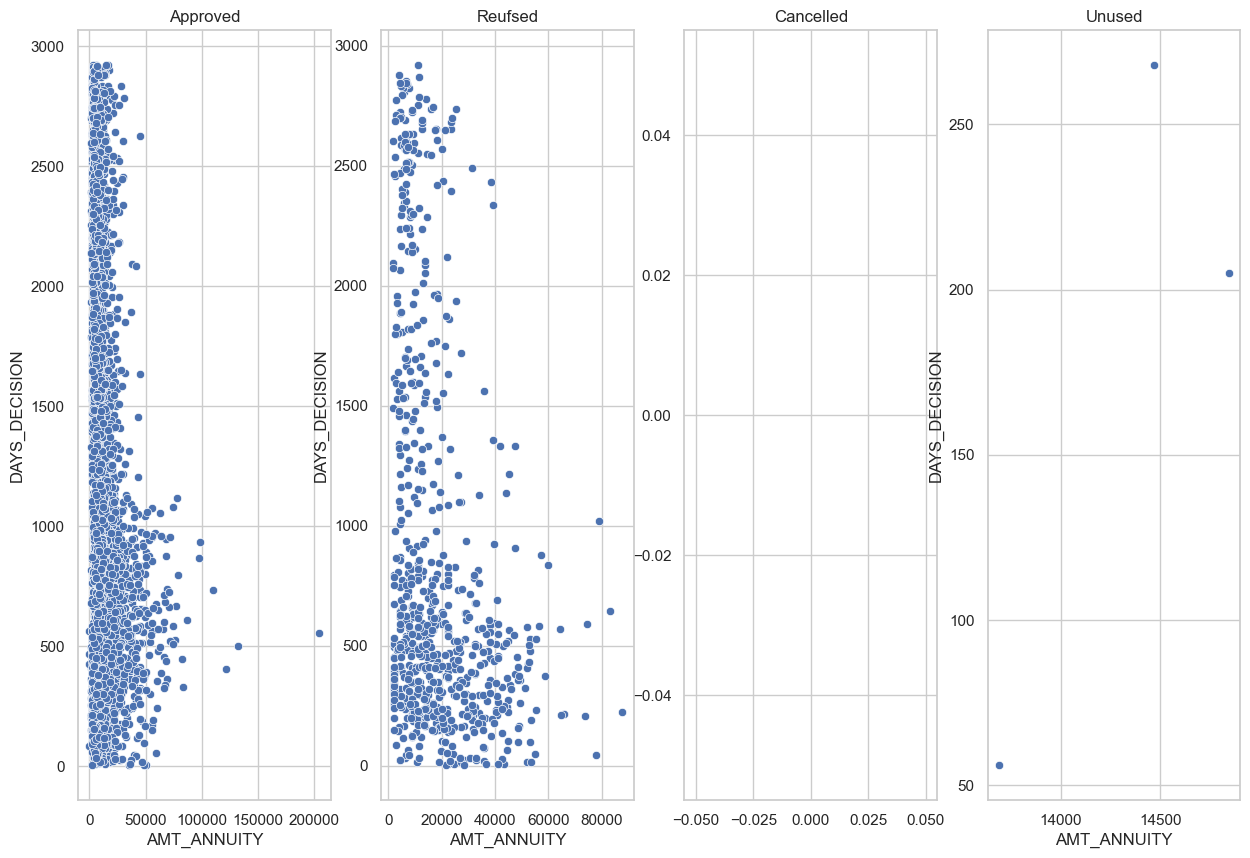

In [352]:
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.title("Approved")
sns.scatterplot(x="AMT_ANNUITY",y="DAYS_DECISION",data=approved)
plt.subplot(1,4,2)
plt.title("Reufsed")
sns.scatterplot(x="AMT_ANNUITY",y="DAYS_DECISION",data=refused)
plt.subplot(1,4,3)
plt.title("Cancelled")
sns.scatterplot(x="AMT_ANNUITY",y="DAYS_DECISION",data=cancelled)
plt.subplot(1,4,4)
plt.title("Unused")
sns.scatterplot(x="AMT_ANNUITY",y="DAYS_DECISION",data=unused)
plt.show()

### Conclusion >> Most applicants have annuity values concentrated in the lower range (below 50,000), regardless of decision timing.

In [356]:
papp_df[['AMT_ANNUITY', 'DAYS_DECISION']]

AMT_ANNUITY  DAYS_DECISION
0        1730.430             73
1       25188.615            164
2       15060.735            301
3       47041.335            512
4       31924.395            781
...           ...            ...
4994          NaN             56
4995          NaN            242
4996    40002.975           1071
4997          NaN            386
4998    11557.395            594

[4999 rows x 2 columns]

## Co-relation between Numerical Columns

In [358]:
corr_approved=approved[["DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT"]]
corr_refused=refused[["DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT"]]
corr_cancelled=cancelled[["DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT"]]
corr_unused=unused[["DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT"]]

##### co-relation for Numerical columns for approved

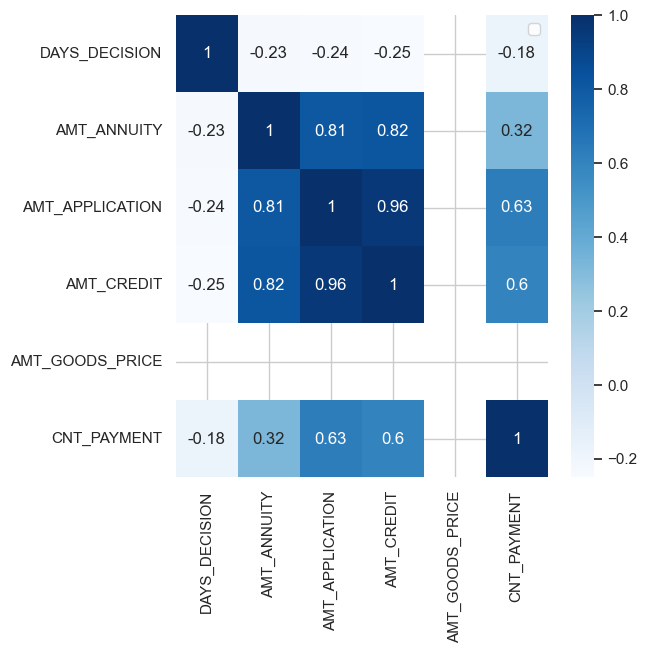

In [364]:
plt.figure(figsize=[6,6])
sns.heatmap(corr_approved.corr(),annot=True,cmap="Blues")
plt.legend()
plt.show()

##### Conclusion : 
1. AMT_APPLICATION has higher Correlation with AMT_CREDIT and AMT_GOODS_PRICE,AMT_ANNUITY

2. DAYS_DECISION has negative Correlation with AMT_GOODS_PRICE,AMT_CREDIT,AMT_APPLICATION,CNT_PAYMENTS,AMT_ANNUITY

#### Co-relation for Numerical columns for Refused

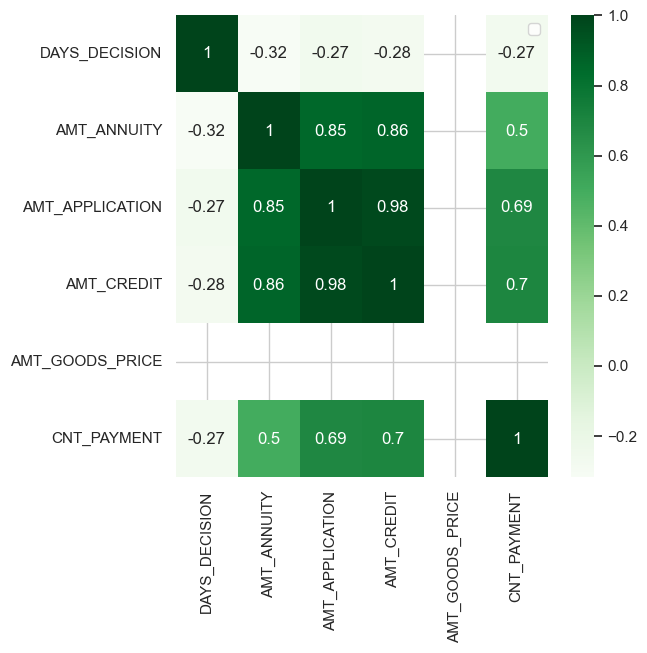

In [366]:
plt.figure(figsize=[6,6])
sns.heatmap(corr_refused.corr(),annot=True,cmap="Greens")
plt.legend()
plt.show()

##### Conclusion : 
1. AMT_APPLICATION has higher Correlation with AMT_CREDIT and AMT_GOODS_PRICE,AMT_ANNUITY

2. DAYS_DECISION has negative Correlation with AMT_GOODS_PRICE,AMT_CREDIT,AMT_APPLICATION,CNT_PAYMENTS

#### Co-relation for Numerical columns for Cancelled

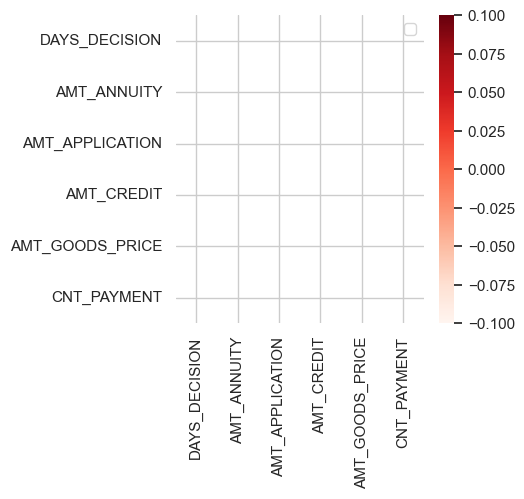

In [374]:
plt.figure(figsize=[4,4])
sns.heatmap(corr_cancelled.corr(),annot=True,cmap="Reds")
plt.legend()
plt.show()

#### Conclusion >> The correlation heatmap for the “Cancelled” applications shows no significant relationships among the numerical variables.

#### Co-relation for Numerical columns for Unused

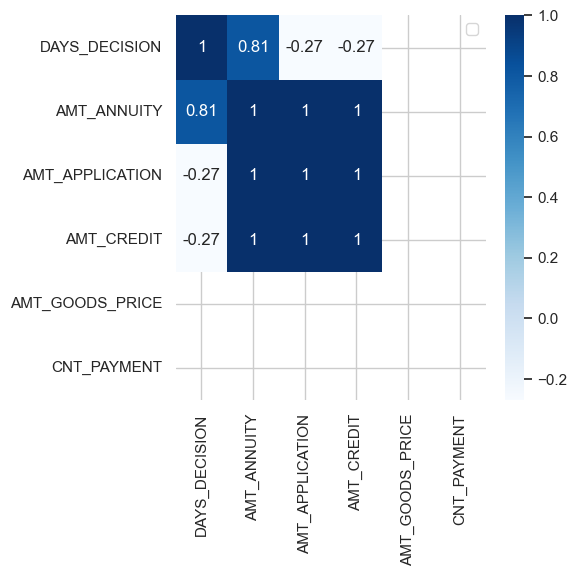

In [382]:
plt.figure(figsize=[5,5])
sns.heatmap(corr_unused.corr(),annot=True,cmap="Blues")
plt.legend()
plt.show()

#### Conclusion :
- Strong positive correlation (0.81) between DAYS_DECISION and AMT_ANNUITY.i.e Loans that were decided earlier tend to have higher annuity amounts.
- perfect correlation (1.0) between AMT_APPLICATION and AMT_CREDIT. Approved loan applications almost exactly match the credit amounts granted.
- Negative correlation (~–0.27) between DAYS_DECISION and both AMT_APPLICATION & AMT_CREDIT. More recent decisions (smaller DAYS_DECISION values) are slightly associated with smaller loan amounts.

## Merge the Application and Previous Application Dataframes 

In [388]:
merge_df=app_df.merge(papp_df,on=["SK_ID_CURR"],how="left")
merge_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100004       0      Revolving loans           M            Y   
3      100006       0           Cash loans           F            N   
4      100007       0           Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               Y             0           67500.0      135000.0   
3               Y             0          135000.0      312682.5   
4               Y             0          121500.0      513000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2         6750.0           135000.0   Unaccompanied          Working   
3        29686.5           297000.0   Unaccompanied          Working   
4        21865.5           513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                          9   
3                    WEDNESDAY                         17   
4                     THURSDAY                         11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0  

In [389]:
papp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_PREV                   4999 non-null   int64   
 1   SK_ID_CURR                   4999 non-null   int64   
 2   NAME_CONTRACT_TYPE           4999 non-null   object  
 3   AMT_ANNUITY                  4015 non-null   float64 
 4   AMT_APPLICATION              4999 non-null   float64 
 5   AMT_CREDIT                   4999 non-null   float64 
 6   AMT_DOWN_PAYMENT             2745 non-null   float64 
 7   AMT_GOODS_PRICE              0 non-null      category
 8   WEEKDAY_APPR_PROCESS_START   4999 non-null   object  
 9   HOUR_APPR_PROCESS_START      4999 non-null   int64   
 10  FLAG_LAST_APPL_PER_CONTRACT  4999 non-null   object  
 11  NFLAG_LAST_APPL_IN_DAY       4999 non-null   int64   
 12  RATE_DOWN_PAYMENT            2745 non-null   float64 
 13  NAM

In [392]:
merge_df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307596 entries, 0 to 307595
Data columns (total 109 columns):
 #    Column                        Dtype   
---   ------                        -----   
 0    SK_ID_CURR                    int64   
 1    TARGET                        int64   
 2    NAME_CONTRACT_TYPE_x          object  
 3    CODE_GENDER                   object  
 4    FLAG_OWN_CAR                  object  
 5    FLAG_OWN_REALTY               object  
 6    CNT_CHILDREN                  int64   
 7    AMT_INCOME_TOTAL              float64 
 8    AMT_CREDIT_x                  float64 
 9    AMT_ANNUITY_x                 float64 
 10   AMT_GOODS_PRICE_x             float64 
 11   NAME_TYPE_SUITE               object  
 12   NAME_INCOME_TYPE              object  
 13   NAME_EDUCATION_TYPE           object  
 14   NAME_FAMILY_STATUS            object  
 15   NAME_HOUSING_TYPE             object  
 16   REGION_POPULATION_RELATIVE    float64 
 17   DAYS_BIRTH                 

### Filtering required columns for our Analysis

In [393]:
for col in merge_df.columns:
    if col.startswith("FLAG"):
        merge_df.drop(columns=col,axis=1,inplace=True)

In [394]:
merge_df.shape

(307596, 80)

In [397]:
res1=pd.pivot_table(data=merge_df,index=["NAME_INCOME_TYPE","NAME_CLIENT_TYPE"],columns=["NAME_CONTRACT_STATUS"],values="TARGET",aggfunc="mean")
res1

NAME_CONTRACT_STATUS                   Approved  Canceled   Refused  \
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                                 
Commercial associate New               0.064865  0.000000  0.000000   
                     Refreshed         0.032787  0.166667  0.100000   
                     Repeater          0.087766  0.057554  0.086957   
Pensioner            New               0.071942       NaN  0.000000   
                     Refreshed         0.000000  0.000000  0.100000   
                     Repeater          0.034483  0.096154  0.050847   
State servant        New               0.028571       NaN  0.000000   
                     Refreshed         0.000000       NaN  0.000000   
                     Repeater          0.072000  0.129032  0.075472   
Unemployed           Repeater          0.000000       NaN       NaN   
Working              New               0.094092  0.333333  0.090909   
                     Refreshed         0.075862  0.111111  0.157895   
                     Repeater          0.085181  0.141304  0.128440   
                     XNA                    NaN  0.000000  0.000000   

NAME_CONTRACT_STATUS                   Unused offer  
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                
Commercial associate New                   0.000000  
                     Refreshed             0.000000  
                     Repeater              0.090909  
Pensioner            New                        NaN  
                     Refreshed             0.000000  
                     Repeater              0.000000  
State servant        New                   0.000000  
                     Refreshed                  NaN  
                     Repeater              0.000000  
Unemployed           Repeater                   NaN  
Working              New                   0.083333  
                     Refreshed             0.000000  
                     Repeater              0.045455  
                     XNA                        NaN

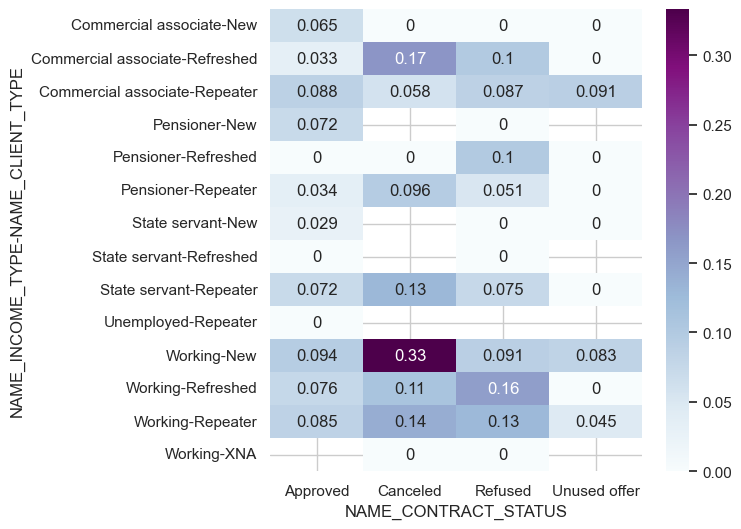

In [401]:
plt.figure(figsize=[6,6])
sns.heatmap(res1,annot=True,cmap="BuPu")
plt.show()

### Conclusion 
- Most approved applications belong to Working clients
- new working clients often cancel their applications
- Refused applications are higher among:
         - Commercial associate-Refreshed (0.17)
         - Working-Refreshed (0.16)
         - State servant-Repeater (0.13)
  Suggests that experienced or repeated applicants in these categories face more rejections.
- Pensioners have very few applications overall,Both approval and refusal rates are low, showing limited participation in credit applications.
- Unemployed and XNA (unknown) client types show almost no activity.Minimal contribution to the loan dataset.

In [405]:
res2=pd.pivot_table(data=merge_df,index=["CODE_GENDER","NAME_SELLER_INDUSTRY"],columns=["TARGET"],values="AMT_GOODS_PRICE_x",aggfunc="sum")
res2

TARGET                                      0           1
CODE_GENDER NAME_SELLER_INDUSTRY                         
F           Auto technology         1548000.0         NaN
            Clothing               30964500.0   2038500.0
            Connectivity          262093500.0  27859500.0
            Construction           28791000.0    373500.0
            Consumer electronics  374138226.0  29988000.0
            Furniture              69561544.5   1800000.0
            Industry               17262000.0   1552500.0
            Jewelry                 1273500.0    477000.0
            MLM partners            3960000.0         NaN
            XNA                   576084136.5  47403000.0
M           Auto technology         3577500.0    891000.0
            Clothing                4851000.0         NaN
            Connectivity          139510498.5  14602500.0
            Construction           14733000.0   1768500.0
            Consumer electronics  253475338.5  14517000.0
            Furniture              21053097.0   3951000.0
            Industry                7159500.0   1255500.0
            Jewelry                  108000.0         NaN
            XNA                   246537720.0  27931500.0

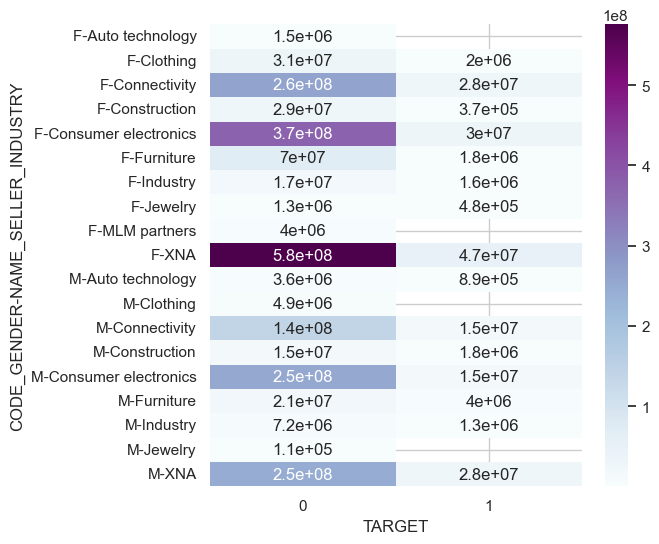

In [406]:
plt.figure(figsize=[6,6])
sns.heatmap(res2,annot=True,cmap="BuPu")
plt.show()

In [ ]:
### Conclusion 
- F-XNA (≈5.8e+08) and M-Connectivity (≈1.4e+08) show the largest transaction values.
- F-Consumer electronics (≈3.7e+08) and F-Connectivity (≈2.6e+08) dominate, indicating that female clients in tech and electronics sectors are more reliable payers.
- M-Consumer electronics (≈2.5e+08) and M-Connectivity (≈1.4e+08) also show strong repayment patterns among male clients.
- F-XNA (≈4.7e+07) and M-XNA (≈2.8e+07) show the highest defaults, meaning undefined seller industries are riskier.
- M-Auto technology and F-Auto technology show comparatively low default values, implying stability in the automotive sector.
- 